In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots

plt.style.use(['science', 'no-latex'])

#Load the YM dataset (this datased was previously created with pandas to better organize the sample's data)
samples_abs_df = pd.read_csv('YM2_dataset.csv')
samples_abs_df['abs_avg'] = samples_abs_df['abs_avg'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['abs_std'] = samples_abs_df['abs_std'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['abs_avg_2mic'] = samples_abs_df['abs_avg_2mic'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['abs_std_2mic'] = samples_abs_df['abs_std_2mic'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['freq'] = samples_abs_df['freq'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['tl_avg'] = samples_abs_df['tl_avg'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['tl_std'] = samples_abs_df['tl_std'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['real_k'] = samples_abs_df['real_k'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['imag_k'] = samples_abs_df['imag_k'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['real_z'] = samples_abs_df['real_z'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['imag_z'] = samples_abs_df['imag_z'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['real_z_2mic'] = samples_abs_df['real_z_2mic'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df['imag_z_2mic'] = samples_abs_df['imag_z_2mic'].apply(lambda x: list(map(float, x.split(', '))))
samples_abs_df = samples_abs_df.set_index('sample')
#samples_abs_df.head(5)
samples_abs_df.drop('YM2_multi_d1', inplace=True)
samples_abs_df.index 
samples_abs_df.rename(columns={'resflux': 'sigma_measured'}, inplace=True) 
samples_abs_df.insert(9, 'sigma_estimated', 1)
samples_abs_df.insert(10, 'porosity_estimated', 1)
samples_abs_df.insert(11, 'tortuosity_estimated', 1)
samples_abs_df.insert(12, 'lambda_analytical', 1)

#samples_abs_df['mass']
samples_abs_df.sort_index(inplace=True)

### Characteristic Impedance ($Z_{c}$)

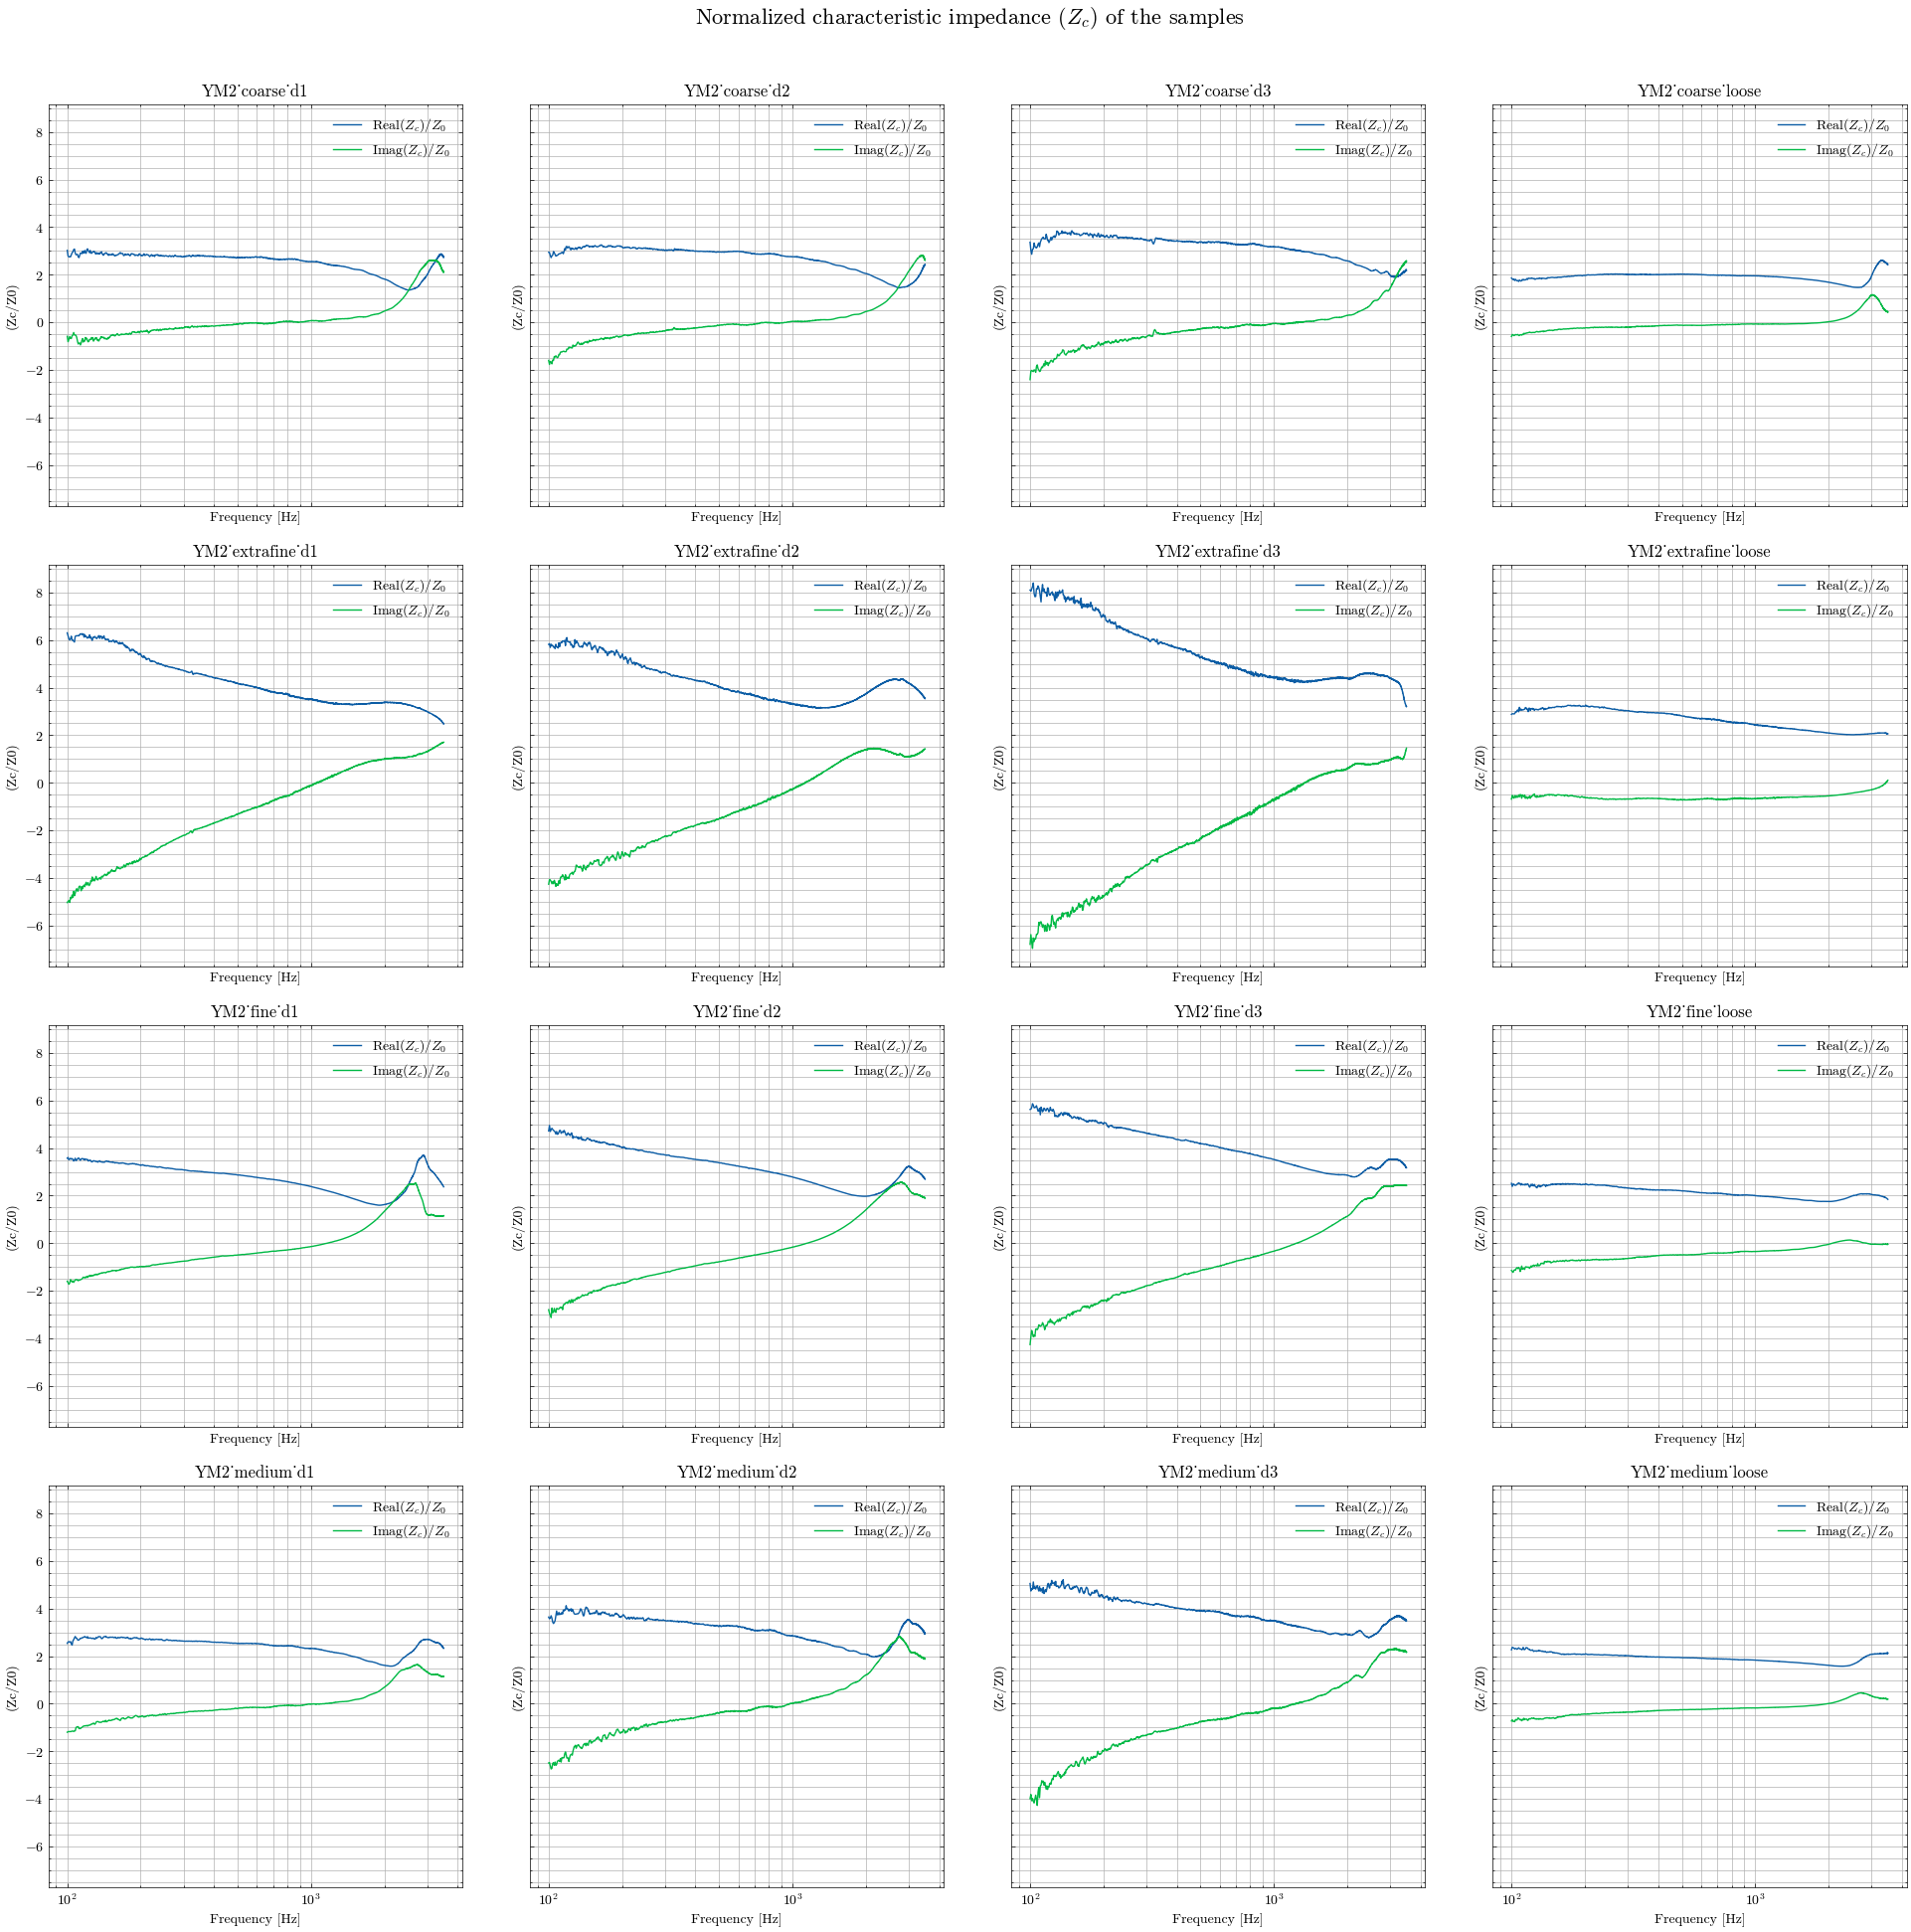

In [21]:
#ncols = (samples_abs_df['density'].unique()).size   
#nrows = (samples_abs_df['granul'].unique()).size  
ncols = 4
nrows = 4
colsize = 20
rowsize = 20


fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True, sharey=True)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=3.5)

r_tube= 45e-3 #Tube radius [m]
s0 = np.pi*(r_tube**2)  #Section of the tube [m^2]
eta = 1.95e-5  # [Pa.s] Dynamic viscosity of air

p_atm = 101300     #Atmospheric pressure [Pa]
temp = 25        #Temperature [°C]
r_air = 287.05
c0 = 331 + 0.607*temp #Velocity of sound [m/s]
#rho0 = 1.293     #Density of air [kg/m^3]
rho0 = p_atm / (r_air * (273.15 + temp))
z0 = rho0*c0      #Characteristic impedance of air [Pa.s/m] [Rayl]

for i, axe in enumerate(ax):

    realz_avgdata = np.array(samples_abs_df.iloc[i]['real_z'])/(z0)     #Average real Zc
    imagz_avgdata = np.array(samples_abs_df.iloc[i]['imag_z'])/(z0)     #Average imag Zc
    realz_avgdata_2mic = np.array(samples_abs_df.iloc[i]['real_z_2mic'])#/(z0)     #Average real Zs
    imagz_avgdata_2mic = np.array(samples_abs_df.iloc[i]['imag_z_2mic'])#/(z0)     #Average imag Zs
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    axe.semilogx(freq, realz_avgdata, label=r'Real($Z_{c}$)/$Z_{0}$')      #Plot over frequency*thickness
    axe.semilogx(freq, imagz_avgdata, label=r'Imag($Z_{c}$)/$Z_{0}$')      #Plot over frequency*thickness
    #if realz_avgdata_2mic.size !=1:
    #    axe.semilogx(freq, realz_avgdata_2mic, '--', label=r'Real($Z_{s}$)/$Z_{0}$_2mic')      #Plot over frequency*thickness
    #    axe.semilogx(freq, imagz_avgdata_2mic, '--', label=r'Imag($Z_{s}$)/$Z_{0}$_2mic')      #Plot over frequency*thickness
    
    comp = realz_avgdata + 1j*imagz_avgdata
    #axe.semilogx(freq, np.abs(comp), label=r'Abs($Z_{c}$)/$Z_{0}$')      #Plot over frequency*thickness
    axe.set_title(f'{sample_name}')
    axe.set_xlabel('Frequency [Hz]')
    #axe.set_xlabel('fd [Hz*m]')
    #axe.set_ylim([0, 1.1])
    axe.set_ylabel('(Zc/Z0)')
    #axe.set_yticks(np.arange(-6, 10, 1))
    axe.grid(which='both')
    axe.legend()
    
fig.subplots_adjust(top=0.93)
fig.suptitle(r'Normalized characteristic impedance ($Z_{c}$) of the samples',fontsize=16)
plt.show()


### Wavenumber ($k$)

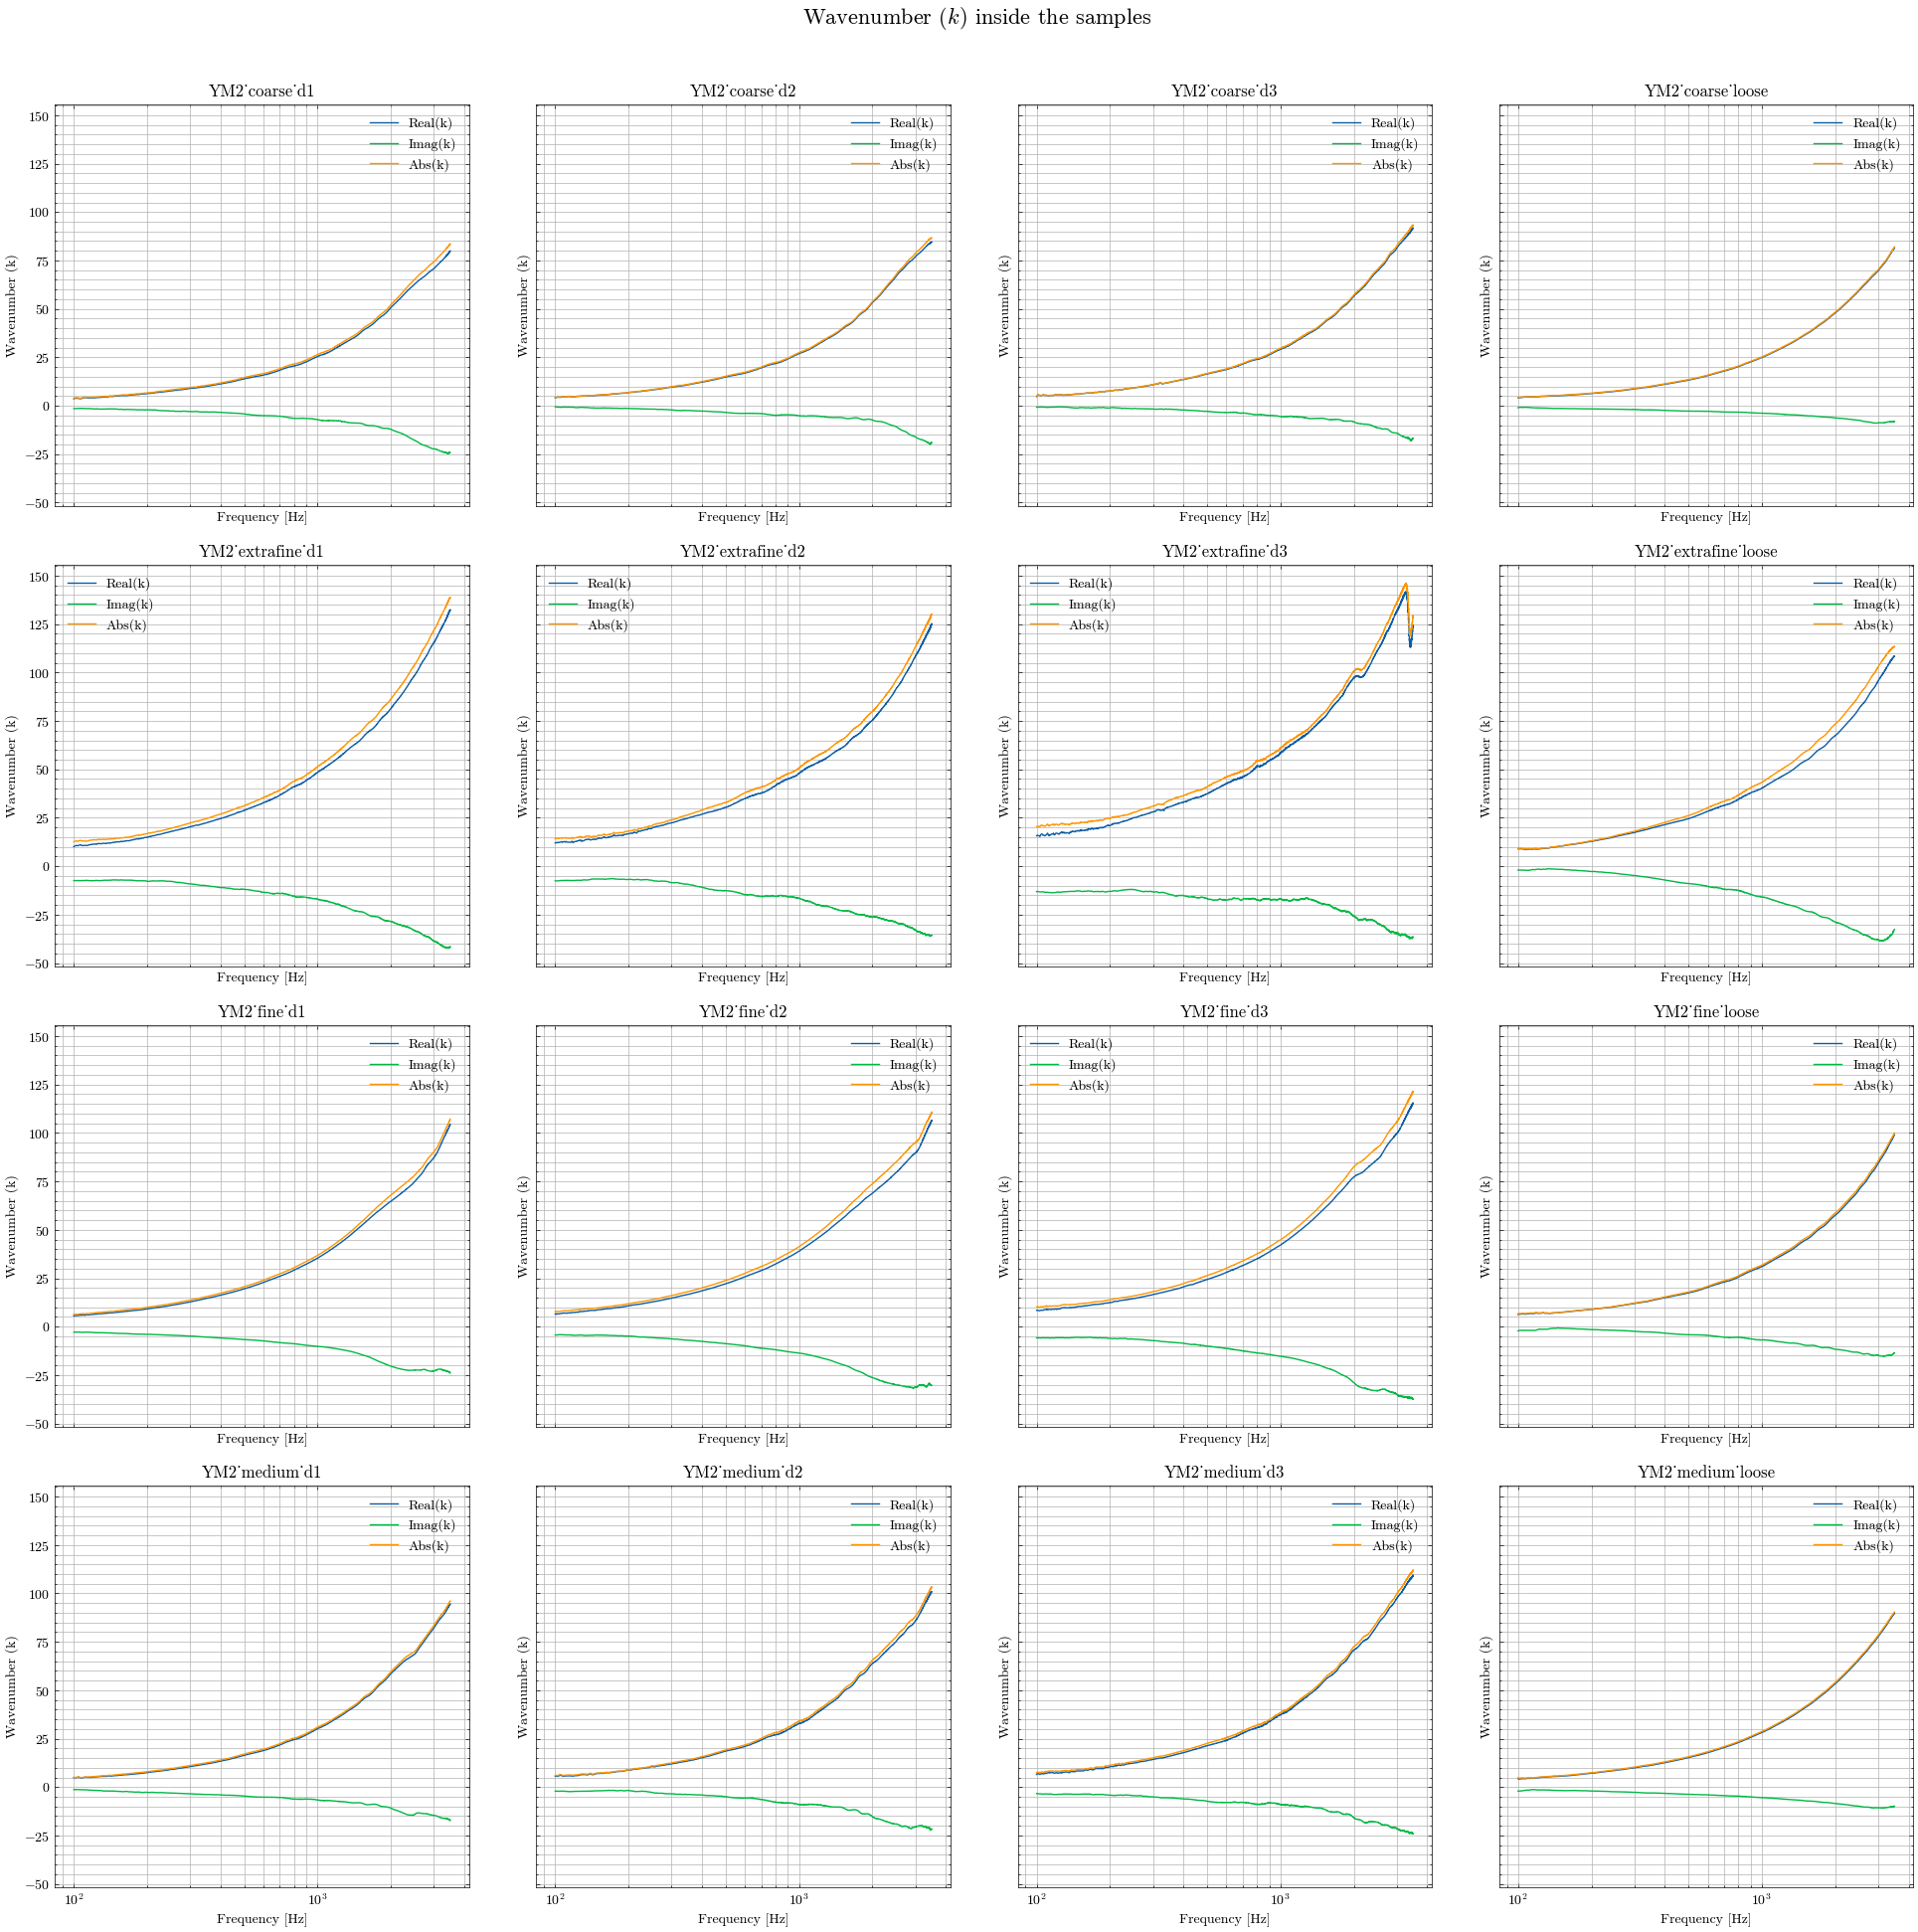

In [22]:

#Wavenumber

fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True, sharey=True)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=3.5)

for i, axe in enumerate(ax):

    realk_avgdata = np.array(samples_abs_df.iloc[i]['real_k'])     #Average real k
    imagk_avgdata = np.array(samples_abs_df.iloc[i]['imag_k'])     #Average imag k
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    axe.semilogx(freq, realk_avgdata, label=r'Real(k)')      #Plot over frequency*thickness
    axe.semilogx(freq, imagk_avgdata, label=r'Imag(k)')      #Plot over frequency*thickness
    comp = realk_avgdata + 1j*imagk_avgdata
    axe.semilogx(freq, np.abs(comp), label=r'Abs(k)')      #Plot over frequency*thickness
    axe.set_title(f'{sample_name}')
    axe.set_xlabel('Frequency [Hz]')
    #axe.set_xlabel('fd [Hz*m]')
    #axe.set_ylim([0, 1.1])
    axe.set_ylabel('Wavenumber (k)')
    axe.grid(which='both')
    axe.legend()
    
fig.subplots_adjust(top=0.93)
fig.suptitle(r'Wavenumber $(k)$ inside the samples',fontsize=16)
plt.show()

### Surface impedance of the samples ($Z_{s}$)
- Surface impedance for soft back-end boundary condition (Sellen)

In [11]:
imagz_avgdata

array([-0.72379087, -0.67348449, -0.7414243 , ...,  0.19609033,
        0.19416351,  0.19423683])

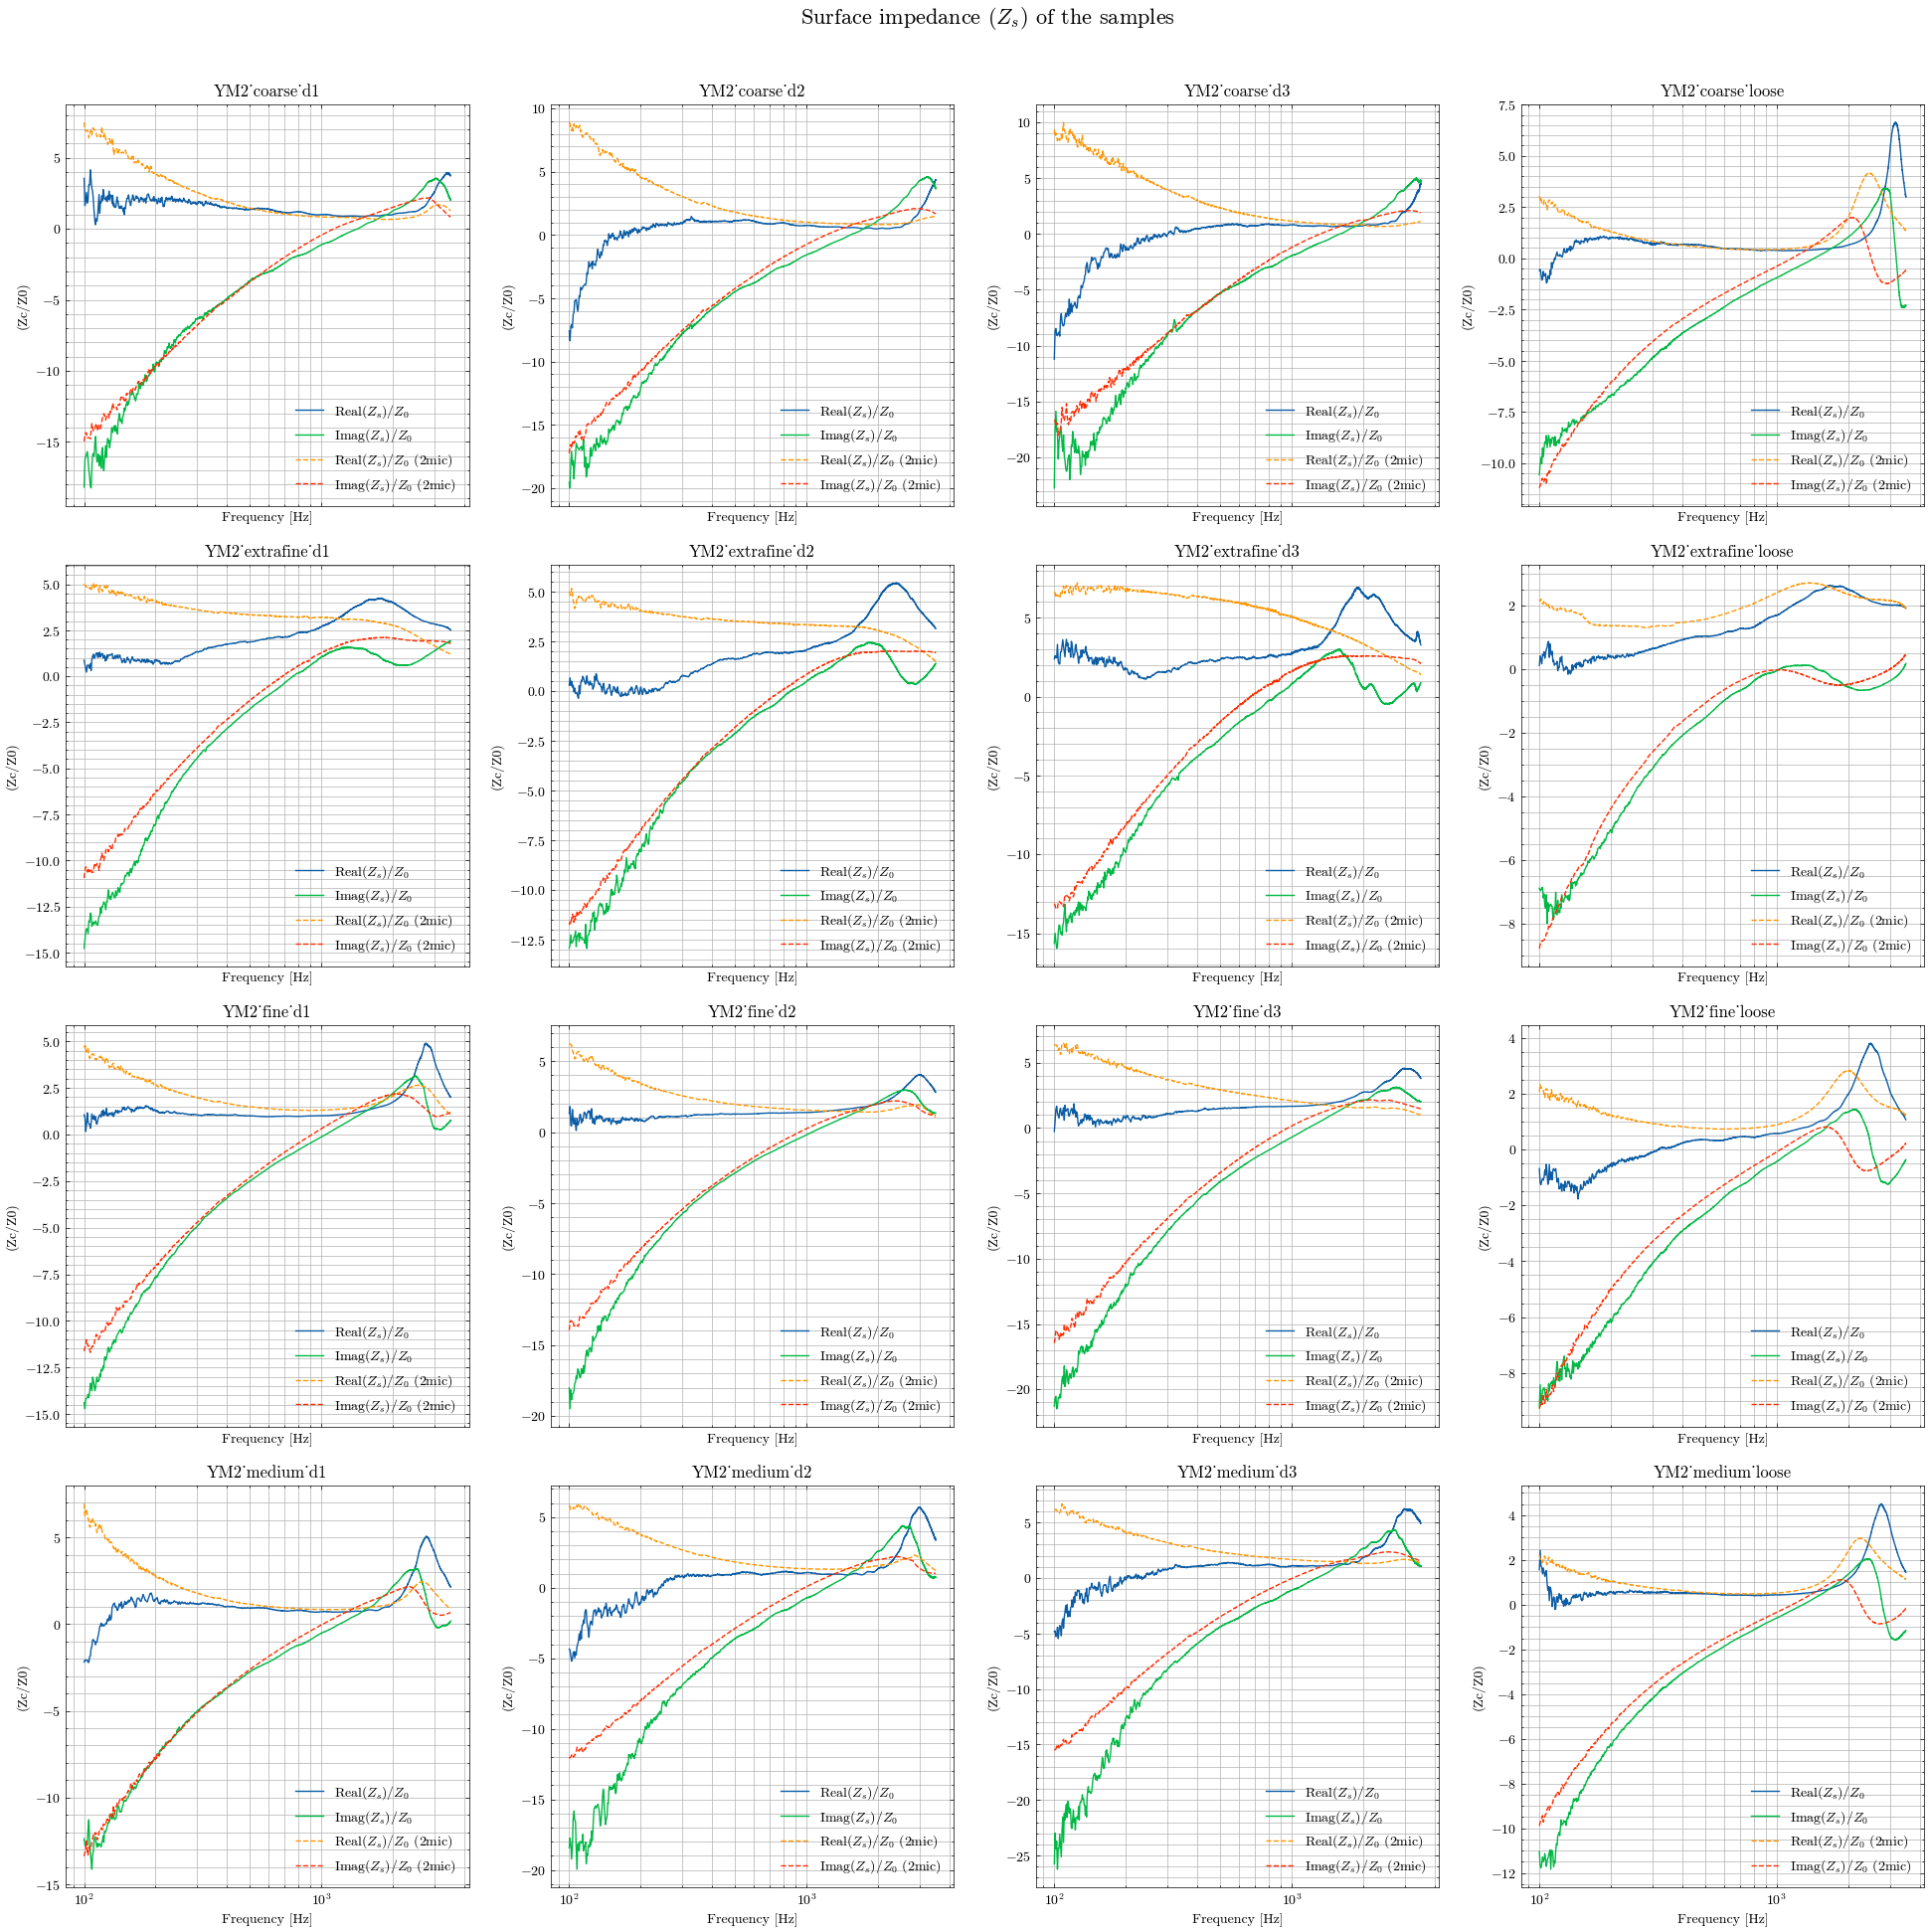

In [23]:
fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True, sharey=False)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=3.5)

r_tube= 45e-3 #Tube radius [m]
s0 = np.pi*(r_tube**2)  #Section of the tube [m^2]

p_atm = 99000    #Atmospheric pressure [Pa]
temp = 25        #Temperature [°C]
r_air = 287.05
c0 = 331 + 0.607*temp #Velocity of sound [m/s]
#rho0 = 1.293     #Density of air [kg/m^3]
rho0 = p_atm / (r_air * (273.15 + temp))
z0 = rho0*c0      #Characteristic impedance of air [Pa.s/m] [Rayl]

for i, axe in enumerate(ax):

    realz_avgdata = np.array(samples_abs_df.iloc[i]['real_z'])/(z0)     #Average real Zc
    imagz_avgdata = np.array(samples_abs_df.iloc[i]['imag_z'])/(z0)     #Average imag Zc
    realk_avgdata = np.array(samples_abs_df.iloc[i]['real_k'])     #Average real Zc
    imagk_avgdata = np.array(samples_abs_df.iloc[i]['imag_k'])     #Average imag Zc
    realz_avgdata_2mic = np.array(samples_abs_df.iloc[i]['real_z_2mic'])#/(z0)     #Average real Zs
    imagz_avgdata_2mic = np.array(samples_abs_df.iloc[i]['imag_z_2mic'])#/(z0)     #Average imag Zs
    
    thickness = np.array(samples_abs_df.iloc[i]['thickness'])*1e-3
    
    comp_k = (realk_avgdata + 1j*imagk_avgdata)
    comp_zc = (realz_avgdata + 1j*imagz_avgdata) #---> va con el menoss???!!!
    
    # TERMINATION BOUNDARY CONDITION:
    
    #comp_zs = 1j * (realz_avgdata + 1j*imagz_avgdata) * (np.sin((realk_avgdata + 1j*imagk_avgdata) * thickness) / np.cos((realk_avgdata + 1j*imagk_avgdata) * thickness))       # open soft end
    #comp_zs = -1j* comp_zc * np.tan(comp_k * thickness)
    
    #comp_zs = -1j * (realz_avgdata + 1j*imagz_avgdata) * (np.cos((realk_avgdata + 1j*imagk_avgdata) * thickness) / np.sin((realk_avgdata + 1j*imagk_avgdata) * thickness))     # rigid end
    comp_zs = -1j* (comp_zc) * (1/np.tan(comp_k * thickness))
    
    #comp_zs = (z0 * (1/np.tan(comp_k * thickness) + 1j * comp_zc)) / ((1/np.tan(comp_k * thickness)) + 1j * (z0 / comp_zc))   # anechoic end (Theorem of the transfer of impedance)
    # FIND THE EXPRESSION FOR ANECHOIC END BOUNDARY CONDITION!!!
    
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency
    axe.semilogx(freq, np.real(comp_zs), label=r'Real($Z_{s}$)/$Z_{0}$')      #Plot over frequency*thickness
    axe.semilogx(freq, np.imag(comp_zs), label=r'Imag($Z_{s}$)/$Z_{0}$')      #Plot over frequency*thickness
    
    if realz_avgdata_2mic.size !=1:
        axe.semilogx(freq, realz_avgdata_2mic, '--', label=r'Real($Z_{s}$)/$Z_{0}$ (2mic)')      #Plot over frequency*thickness
        axe.semilogx(freq, imagz_avgdata_2mic, '--', label=r'Imag($Z_{s}$)/$Z_{0}$ (2mic)')      #Plot over frequency*thickness
    
    # y_value = 1
    # y_value_im = 0
    # index = np.where(np.isclose(np.real(comp_zs), y_value, atol=1e-2))[0]
    # index_im = np.where(np.isclose(np.imag(comp_zs), y_value_im, atol=1e-1))[0]
    # if len(index) > 0:
    #     for i in index:
    #         axe.plot(freq[i], np.real(comp_zs[i]), 'ro', markersize=3)  # 'ro' means red color, circle marker
    # if len(index_im) > 0:
    #     for i in index_im:
    #         axe.plot(freq[i], np.imag(comp_zs[i]), 'ro', markersize=3)  # 'ro' means red color, circle marker        
    
    #axe.semilogx(freq, np.abs(comp_zs), label=r'Abs($Z_{s}$)/$Z_{0}$')      #Plot over frequency*thickness
    axe.set_title(f'{sample_name}')
    axe.set_xlabel('Frequency [Hz]')
    
    #axe.set_ylim([-10, 10])
    axe.set_ylabel('(Zc/Z0)')
    #axe.set_yticks(np.arange(-6, 10, 1))
    axe.grid(which='both')
    axe.legend()
    
fig.subplots_adjust(top=0.93)
fig.suptitle(r'Surface impedance ($Z_{s}$) of the samples',fontsize=16)
plt.show()

### Velocity of sound inside the material ($c$)

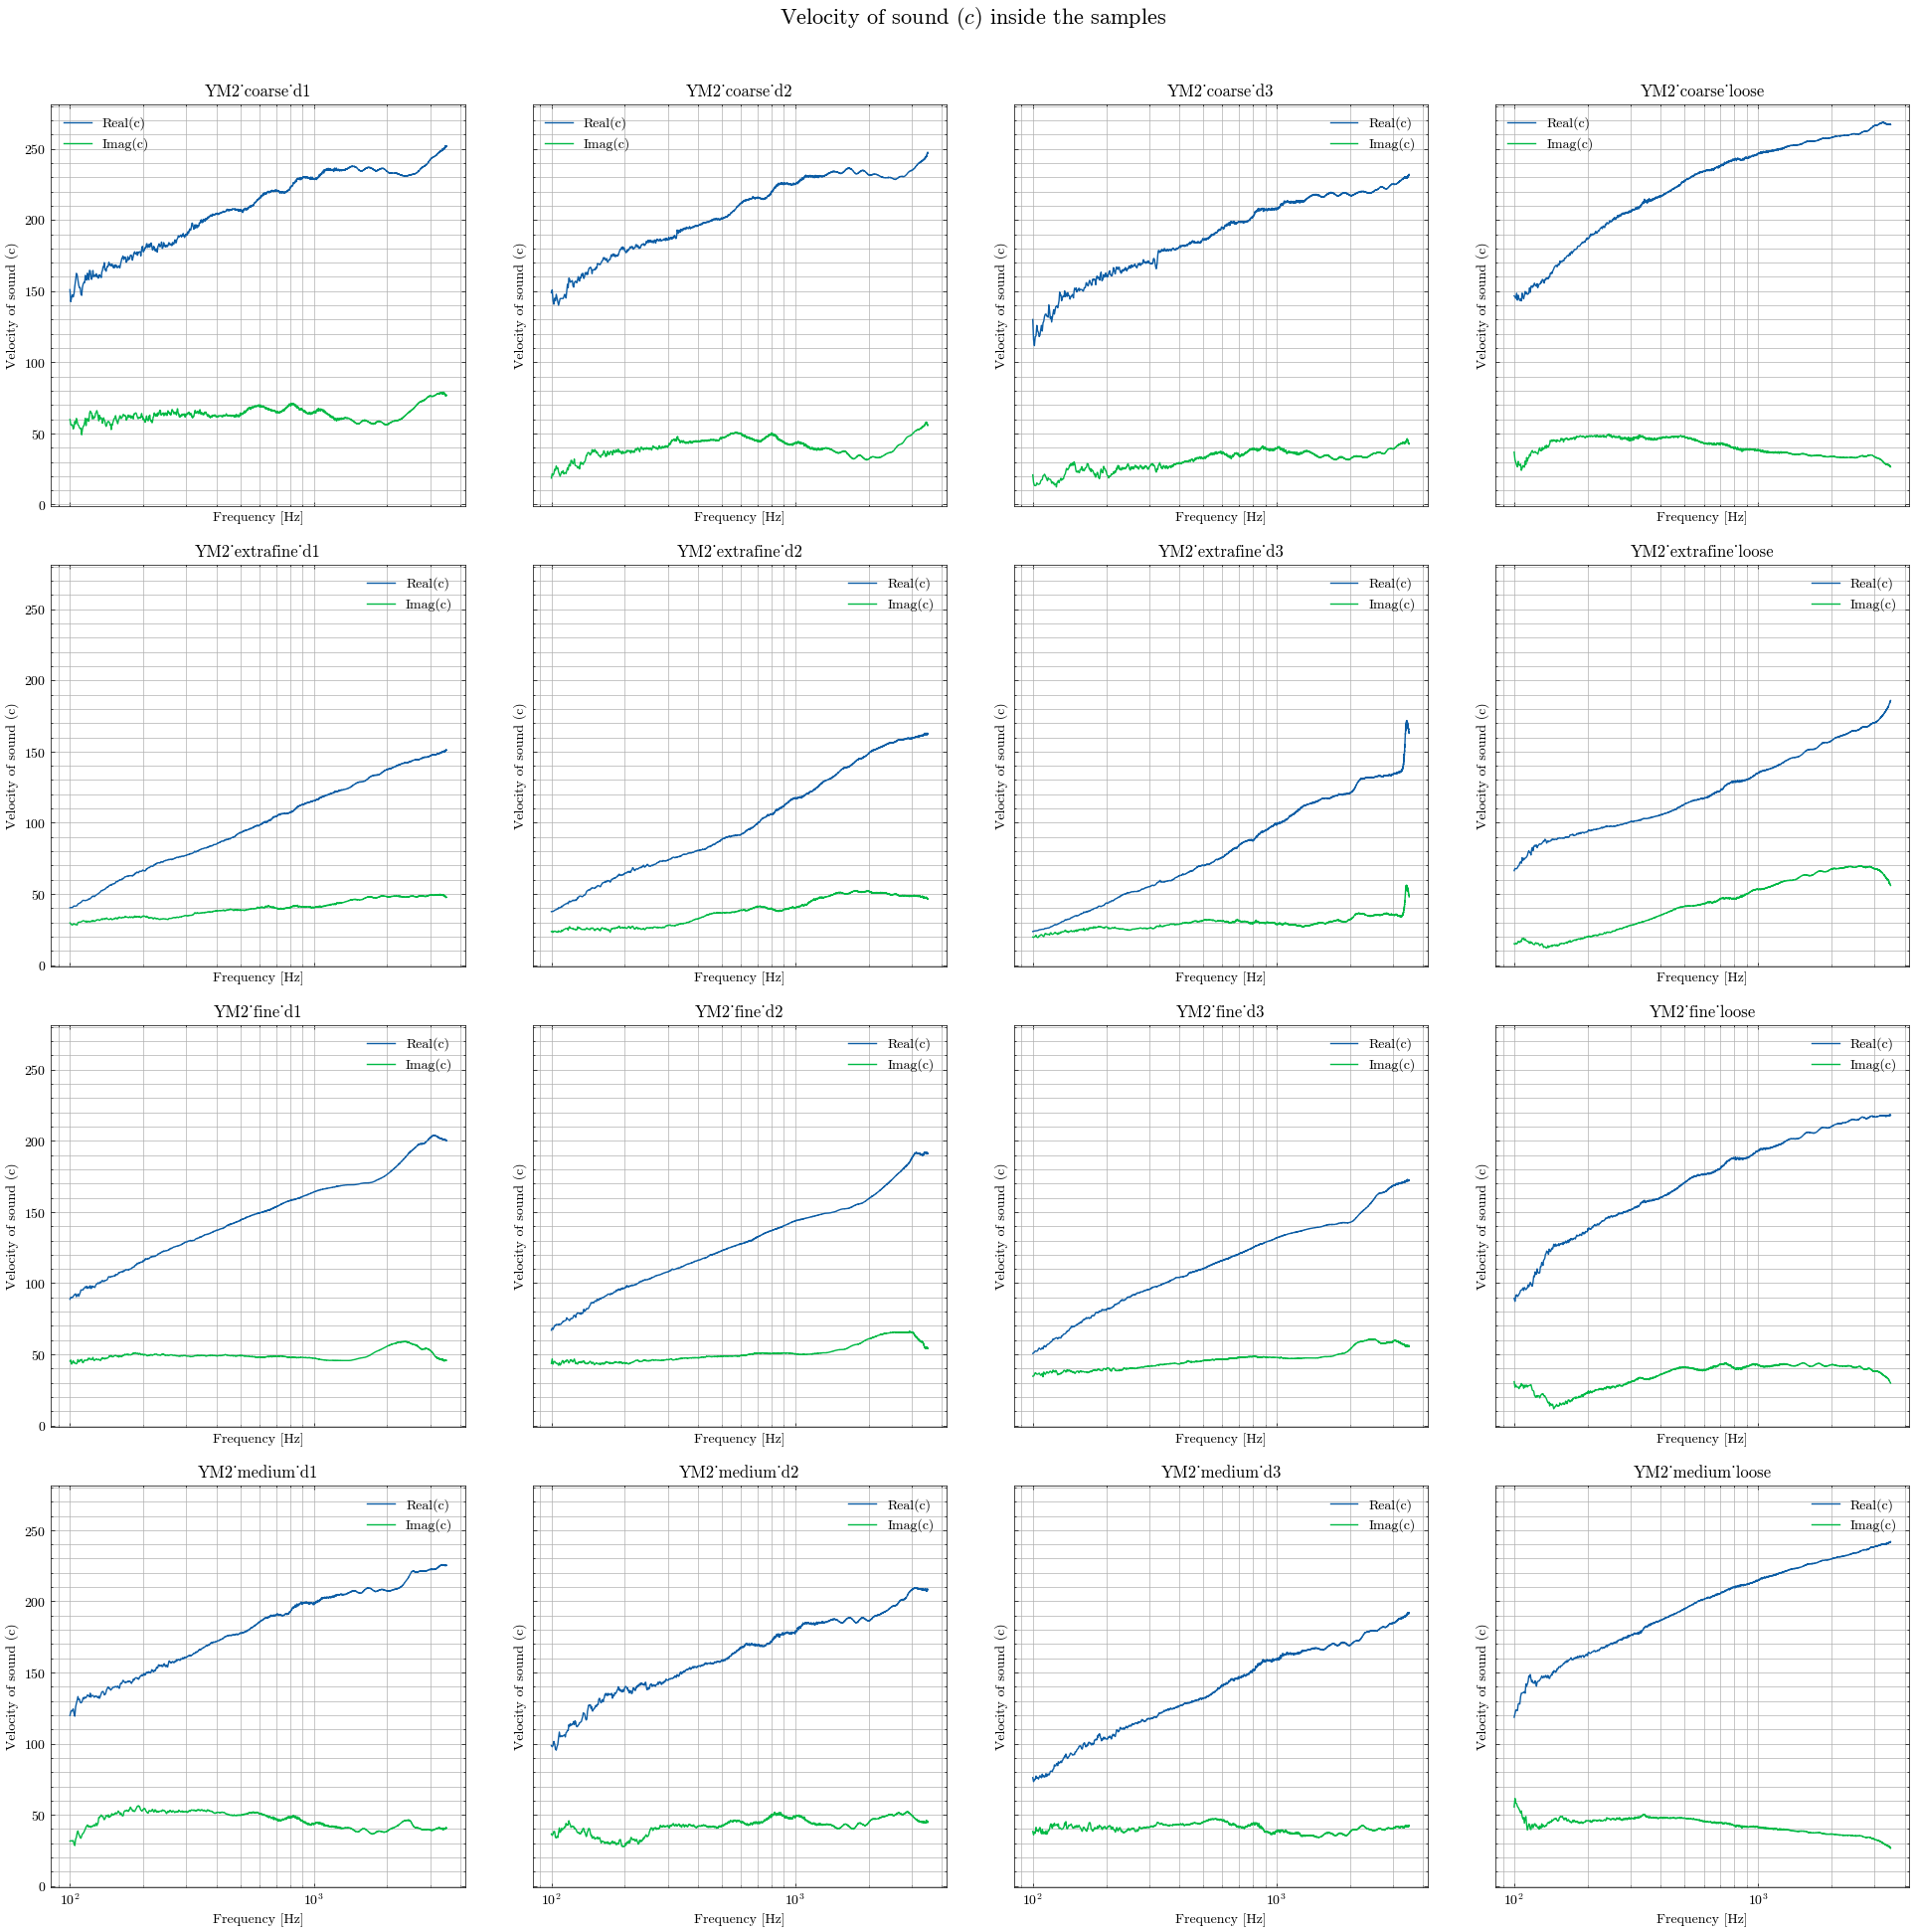

In [24]:
n_samples = samples_abs_df.index.size
samples_abs_df.loc[:,'real_c'] = 1
samples_abs_df.loc[:,'imag_c'] = 1
samples_abs_df['real_c'] = samples_abs_df['real_c'].astype('object') 
samples_abs_df['imag_c'] = samples_abs_df['imag_c'].astype('object') 

for i in samples_abs_df.index:
    samples_abs_df.at[i, 'real_c'] = list(np.real(2*np.pi*freq/(np.array(samples_abs_df.loc[i]['real_k']) + 1j*np.array(samples_abs_df.loc[i]['imag_k']))))
    samples_abs_df.at[i, 'imag_c'] = list(np.imag(2*np.pi*freq/(np.array(samples_abs_df.loc[i]['real_k']) + 1j*np.array(samples_abs_df.loc[i]['imag_k']))))


#Characteristic Impedance

fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True, sharey=True)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=3.5)

for i, axe in enumerate(ax):
    #if i == len(ax)-1:  #If the last plot is reached, break the loop
    #    break
    realc_avgdata = np.array(samples_abs_df.iloc[i]['real_c'])     #Average real Zc
    imagc_avgdata = np.array(samples_abs_df.iloc[i]['imag_c'])     #Average imag Zc
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    axe.semilogx(freq, realc_avgdata, label=r'Real(c)')      #Plot over frequency*thickness
    axe.semilogx(freq, imagc_avgdata, label=r'Imag(c)')      #Plot over frequency*thickness
    comp = realc_avgdata + 1j*imagc_avgdata
    #axe.semilogx(freq, np.abs(comp), label=r'Abs(c)')      #Plot over frequency*thickness
    axe.set_title(f'{sample_name}')
    axe.set_xlabel('Frequency [Hz]')
    #axe.set_xlabel('fd [Hz*m]')
    #axe.set_ylim([0, 1.1])
    axe.set_ylabel('Velocity of sound (c)')
    axe.grid(which='both')
    axe.legend()
    
fig.subplots_adjust(top=0.93)
fig.suptitle(r'Velocity of sound $(c)$ inside the samples',fontsize=16)
plt.show()

### Dynamic mass density ($\rho_{c}$):

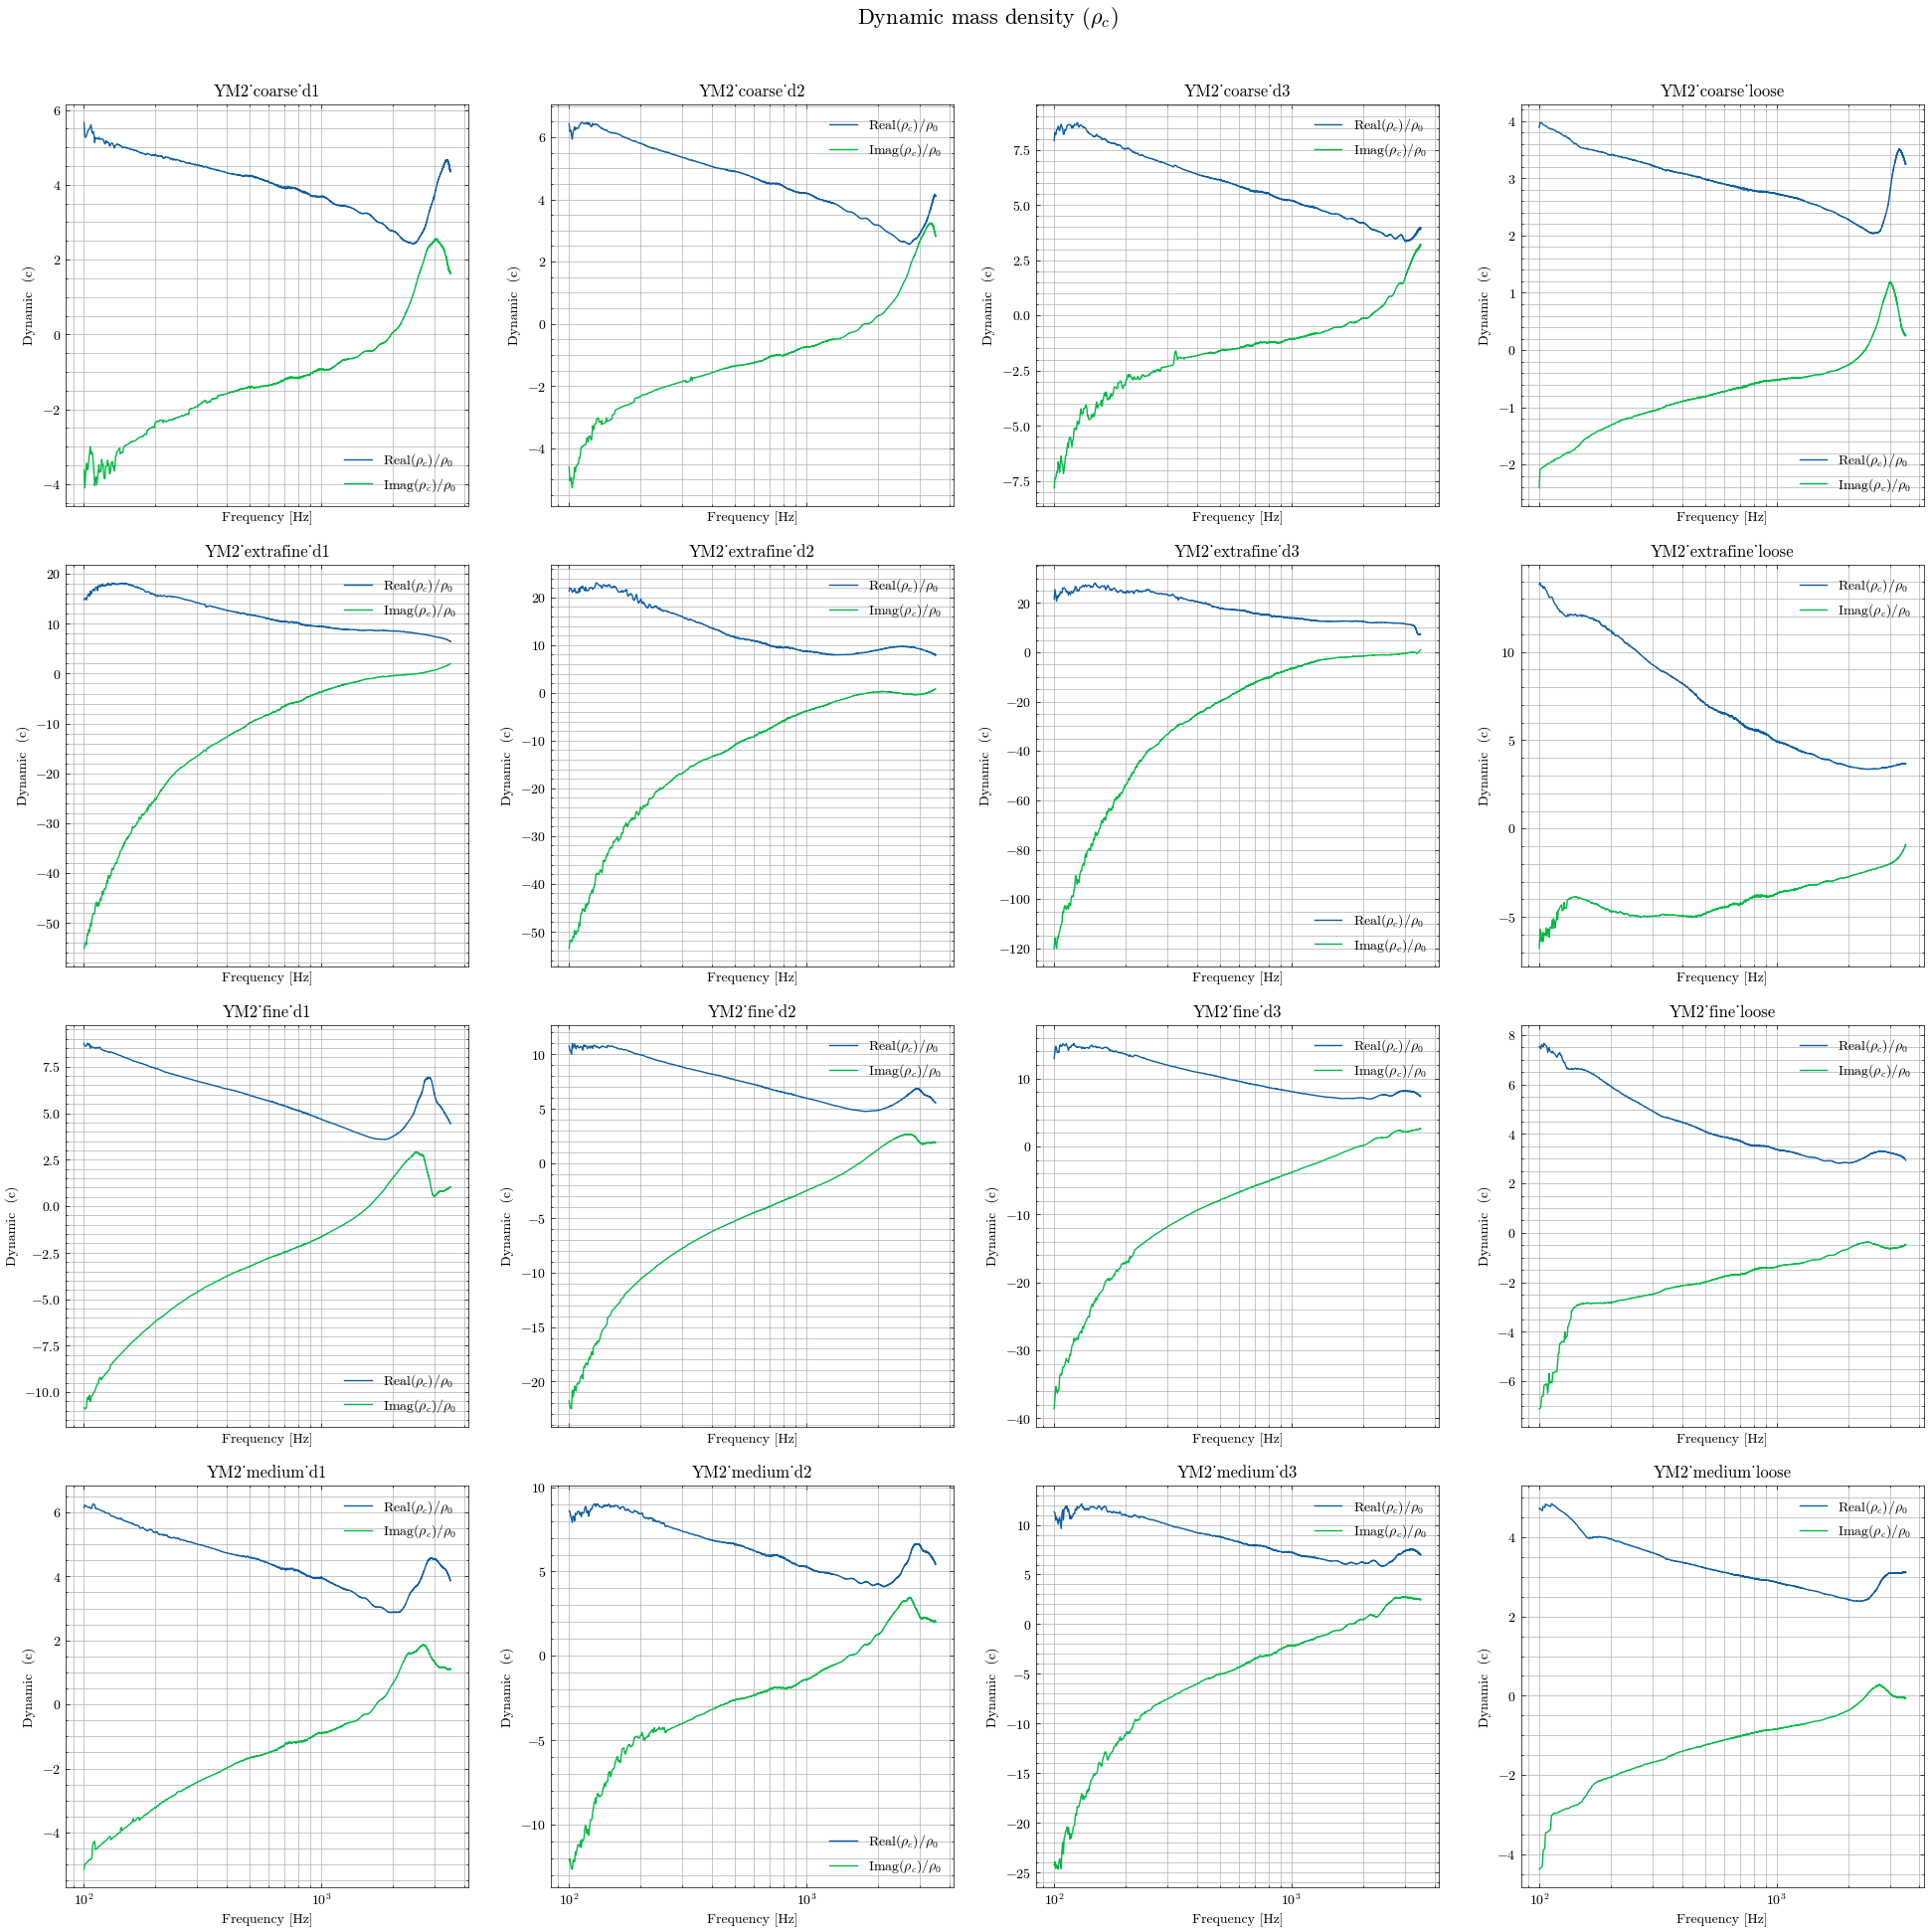

In [25]:
n_samples = samples_abs_df.index.size
samples_abs_df.loc[:,'real_rho'] = 1
samples_abs_df.loc[:,'imag_rho'] = 1
samples_abs_df['real_rho'] = samples_abs_df['real_rho'].astype('object') 
samples_abs_df['imag_rho'] = samples_abs_df['imag_rho'].astype('object') 

# Calculus of dynamic mass density
for i in samples_abs_df.index:
    zc = np.array(samples_abs_df.loc[i]['real_z']) + 1j*np.array(samples_abs_df.loc[i]['imag_z'])
    k = np.array(samples_abs_df.loc[i]['real_k']) + 1j*np.array(samples_abs_df.loc[i]['imag_k'])
    samples_abs_df.at[i, 'real_rho'] = list(np.real((zc*k)/(2*np.pi*freq)))
    samples_abs_df.at[i, 'imag_rho'] = list(np.imag((zc*k)/(2*np.pi*freq)))
    

#Dynamic mass density (rho_c)

fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True, sharey=False)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=3.5)

for i, axe in enumerate(ax):

    realrho_avgdata = np.array(samples_abs_df.iloc[i]['real_rho'])/rho0     #Average real Zc
    imagrho_avgdata = np.array(samples_abs_df.iloc[i]['imag_rho'])/rho0     #Average imag Zc
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    axe.semilogx(freq, realrho_avgdata, label=r'Real($\rho_{c}$)/$\rho_{0}$')      #Plot over frequency*thickness
    axe.semilogx(freq, imagrho_avgdata, label=r'Imag($\rho_{c}$)/$\rho_{0}$')      #Plot over frequency*thickness
    comp = realrho_avgdata + 1j*imagrho_avgdata
    #axe.semilogx(freq, np.abs(comp), label=r'Abs($\rho_{c}$)/$\rho_{0}$')      #Plot over frequency*thickness
    axe.set_title(f'{sample_name}')
    axe.set_xlabel('Frequency [Hz]')
    #axe.set_xlabel('fd [Hz*m]')
    #axe.set_ylim([0, 1.1])
    axe.set_ylabel('Dynamic  (c)')
    axe.grid(which='both')
    axe.legend()
    
fig.subplots_adjust(top=0.93)
fig.suptitle(r'Dynamic mass density ($\rho_{c}$)',fontsize=16)
plt.show()




In [26]:
zc[0]

(929.038391844483-296.5690901413023j)

### Bulk modulus ($\Kappa$):

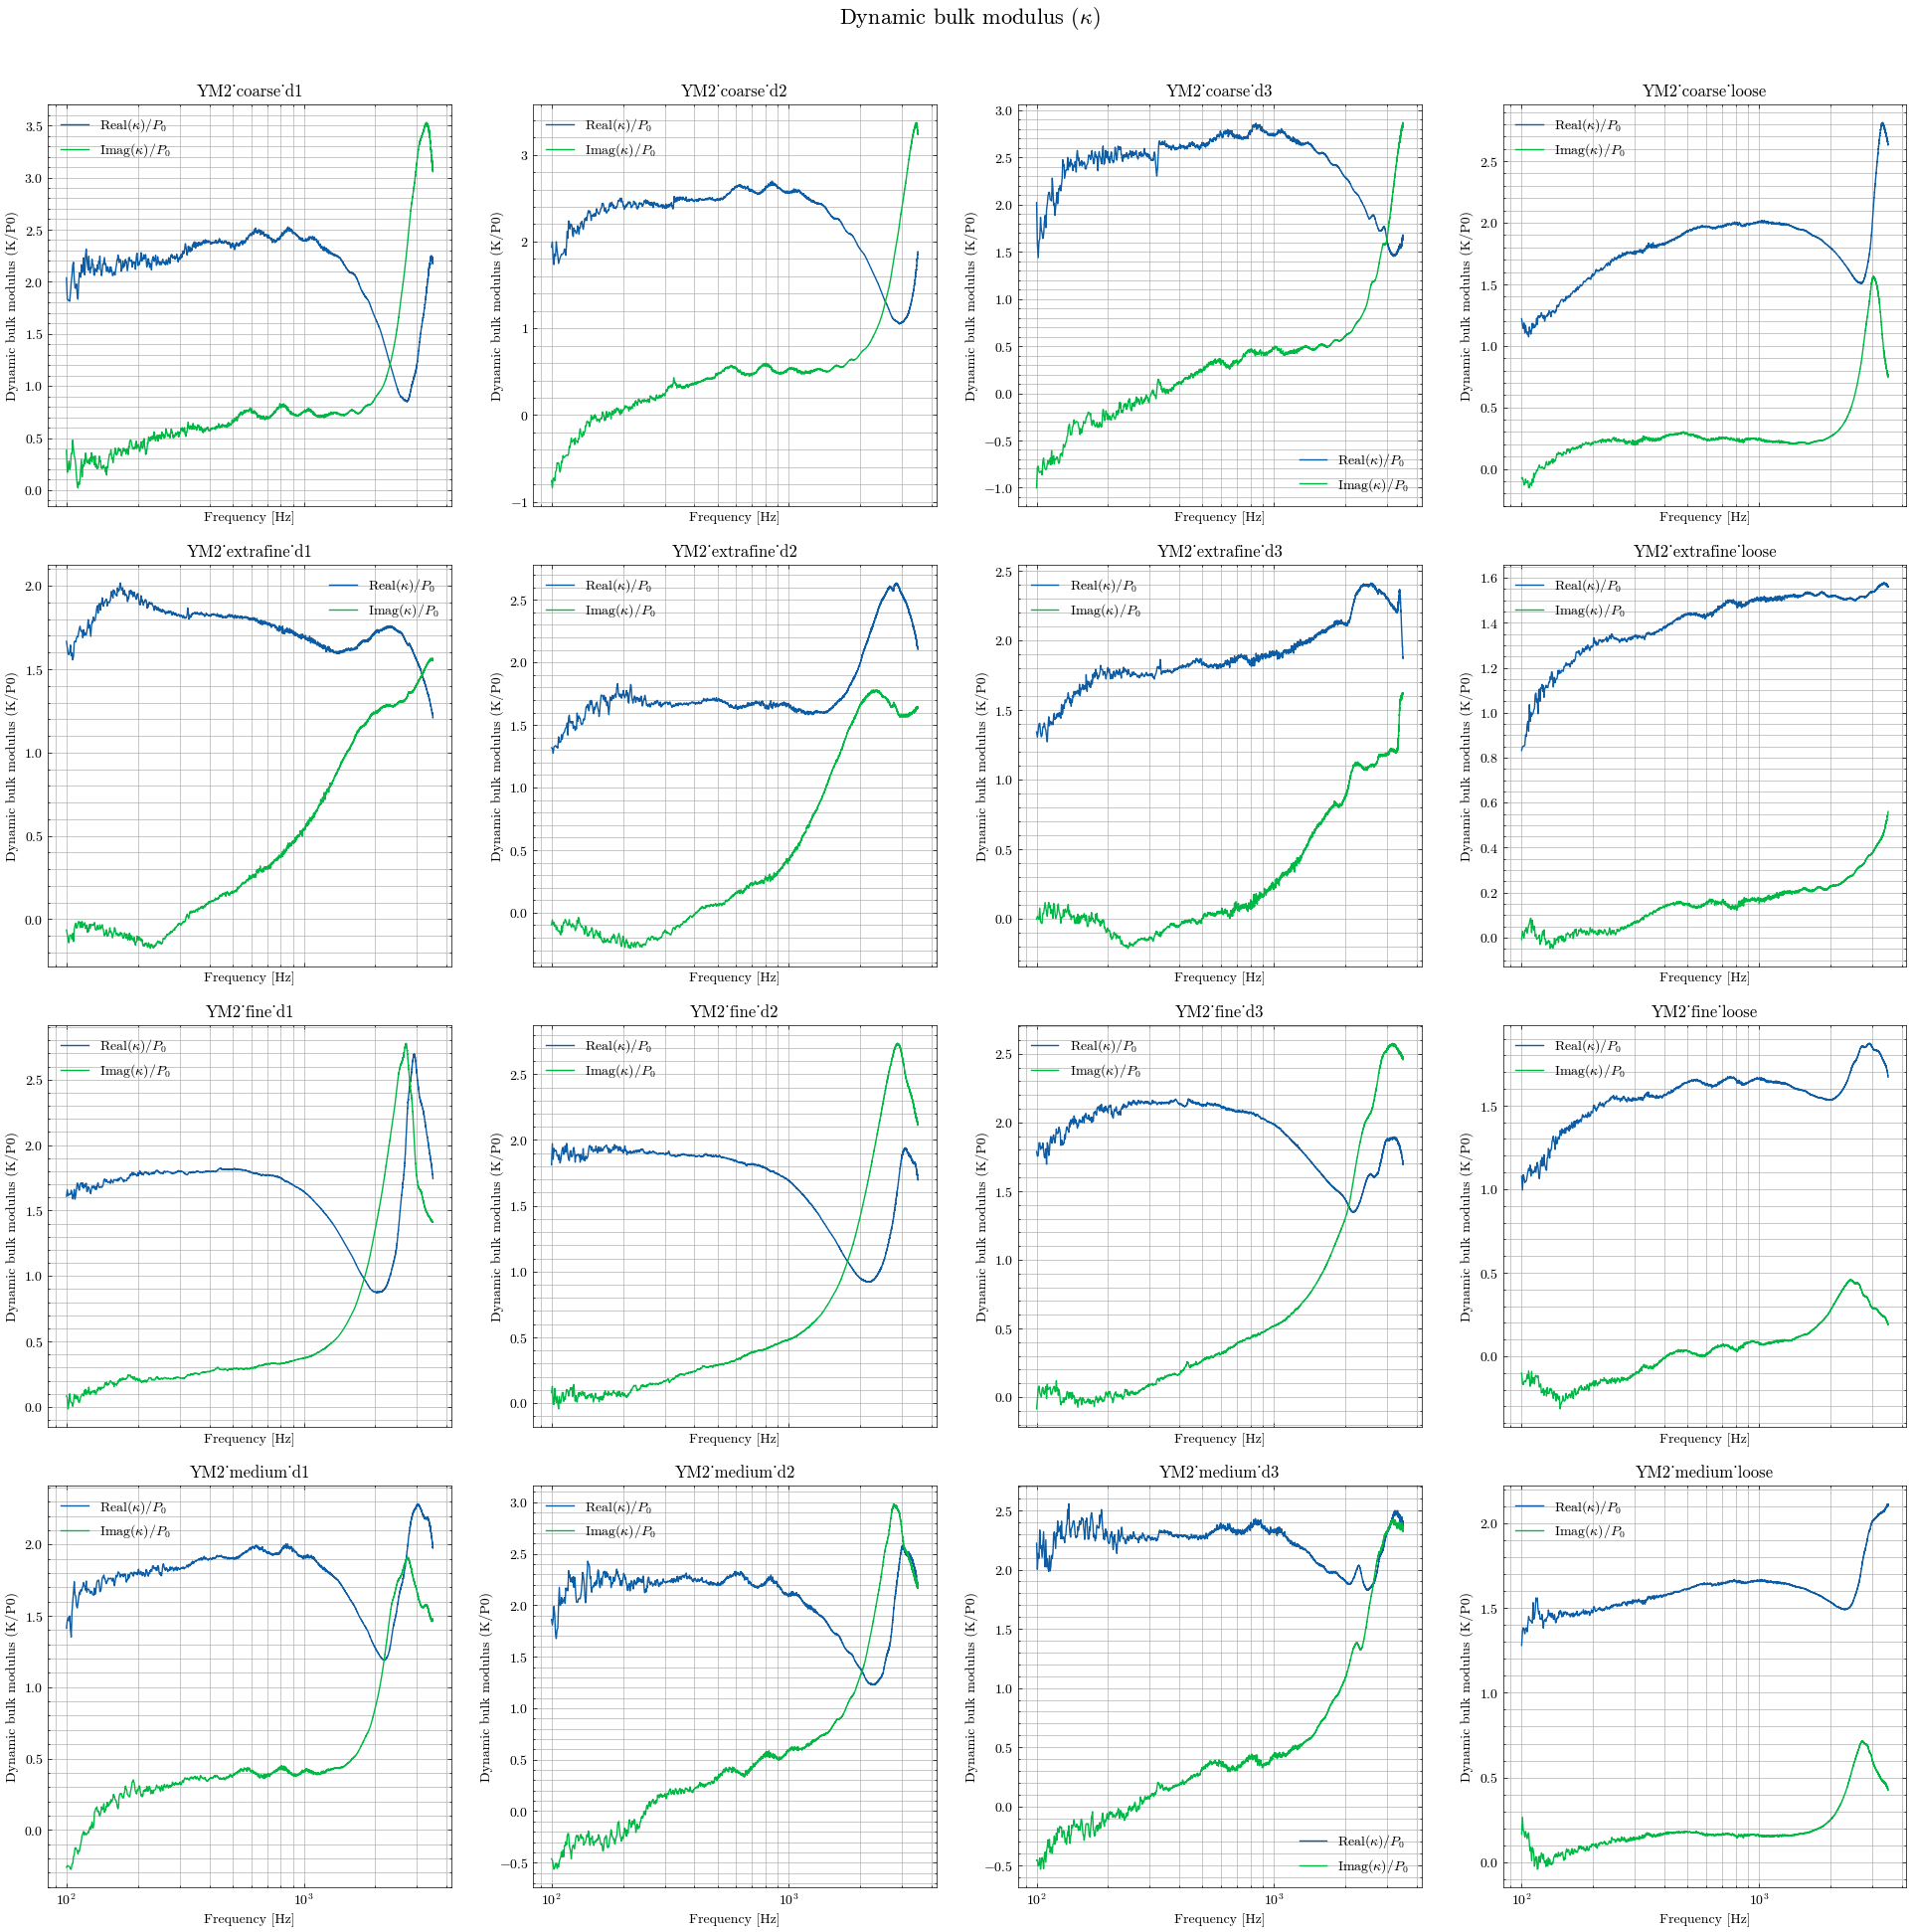

In [27]:
n_samples = samples_abs_df.index.size
samples_abs_df.loc[:,'real_K'] = 1
samples_abs_df.loc[:,'imag_K'] = 1
samples_abs_df['real_K'] = samples_abs_df['real_K'].astype('object') 
samples_abs_df['imag_K'] = samples_abs_df['imag_K'].astype('object') 


for i in samples_abs_df.index:
    zc = np.array(samples_abs_df.loc[i]['real_z']) + 1j*np.array(samples_abs_df.loc[i]['imag_z'])
    k = np.array(samples_abs_df.loc[i]['real_k']) + 1j*np.array(samples_abs_df.loc[i]['imag_k'])
    samples_abs_df.at[i, 'real_K'] = list(np.real((zc * 2 * np.pi * freq) / k))
    samples_abs_df.at[i, 'imag_K'] = list(np.imag((zc * 2 * np.pi * freq) / k))


fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=3.5)

for i, axe in enumerate(ax):

    realK_avgdata = np.array(samples_abs_df.iloc[i]['real_K'])/p_atm     #Average real Kc
    imagK_avgdata = np.array(samples_abs_df.iloc[i]['imag_K'])/p_atm     #Average imag Kc
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    fd = np.array(samples_abs_df.iloc[i]['freq']) * np.array(samples_abs_df.iloc[i]['thickness'])
    sample_name = samples_abs_df.index[i]
    
    #Plot over frequency*thickness (in order to compare samples with different thicknesses)
    axe.semilogx(freq, realK_avgdata, label=r'Real($\kappa$)/$P_{0}$')      #Plot over frequency*thickness
    axe.semilogx(freq, imagK_avgdata, label=r'Imag($\kappa$)/$P_{0}$')      #Plot over frequency*thickness
    comp = realK_avgdata + 1j*imagK_avgdata
    #axe.semilogx(freq, np.abs(comp), label=r'Abs($\kappa$)/$P_{0}$')      #Plot over frequency*thickness
    axe.set_title(f'{sample_name}')
    axe.set_xlabel('Frequency [Hz]')
    #axe.set_xlabel('fd [Hz*m]')
    #axe.set_ylim([0, 1.1])
    axe.set_ylabel('Dynamic bulk modulus (K/P0)')
    axe.grid(which='both')
    axe.legend()
    
fig.subplots_adjust(top=0.93)
fig.suptitle(r'Dynamic bulk modulus ($\kappa$)',fontsize=16)
plt.show()

### Porosity from the low or high-frequency asymptotes of Real(K)

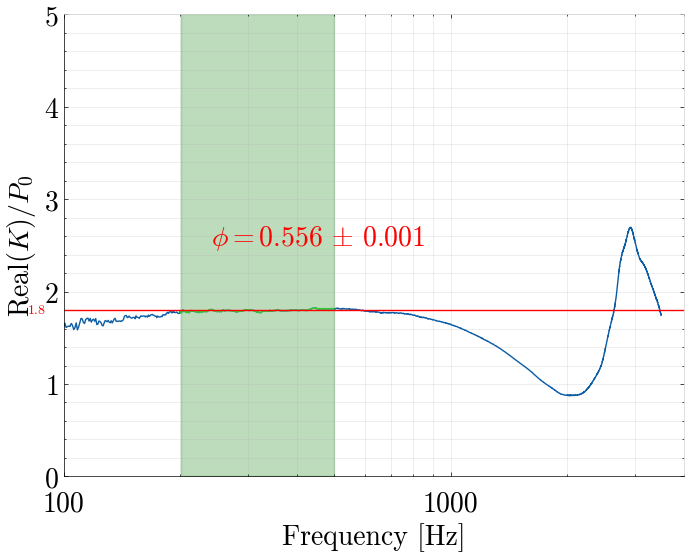

In [130]:
from scipy.optimize import curve_fit

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

sample_selected = 'YM2_fine_d1'

realK_avgdata = np.array(samples_abs_df.loc[sample_selected]['real_K'])/p_atm     #Average real Kc
imagK_avgdata = np.array(samples_abs_df.loc[sample_selected]['imag_K'])/p_atm     #Average imag Kc

# Frequency interval to analyse
freq_start = 200 
freq_end = 500

index_start = np.where(freq==freq_start)[0][0]
index_end = np.where(freq==freq_end)[0][0]

interval_x = freq[(freq >= freq_start) & (freq <= freq_end)]
interval_y = realK_avgdata[index_start:index_end+1]

# Function to fit: a horizontal line (y = a) with a constant slope
def horizontal_line(x, a):
    return a

# Initial guess for the parameter 'a'
p0 = np.mean(interval_y)

# Fit the line to the interval data
popt, pcov = curve_fit(horizontal_line, interval_x, interval_y, p0=p0)
std_dev = np.sqrt(np.diag(pcov))

fontsize=20

ax.semilogx(freq, realK_avgdata) #, label=r'Real($\kappa$)/$P_{0}$ (Measured)')
ax.semilogx(interval_x, interval_y, c='limegreen')
#ax.semilogx(freq, line_fit, '--',c='r')
ax.axhline(popt, color='red', alpha=1)
cond1 = freq>freq_start
cond2=  freq<freq_end
comb_cond = cond1 & cond2 
ax.fill_between(freq, 0, 5, where= comb_cond, color='forestgreen', alpha=0.3)
ax.text(85, round(popt[0],2), f'${round(popt[0],2)}$', ha="center", va="center", c='r')
ax.text(freq_start*1.2, 2.5, f'$\phi =${round(1/round(popt[0],3),3)} $\pm$ {round(std_dev[0],3)}', ha="left", va="baseline", c='r', fontsize=fontsize)
#ax.semilogx(freq, imagK_avgdata)
ax.grid(which='both', alpha=0.3)
ax.set_xlim(100, 4000)
ax.set_ylim(0, 5)
ax.set_xlabel('Frequency [Hz]', fontsize=fontsize)
ax.set_ylabel(r'Real($K)/P_0$', fontsize=fontsize)
ax.tick_params(axis='both', labelsize=fontsize)
ax.spines['right'].set_color('lightgrey')
ax.spines['top'].set_color('lightgrey')
ax.set_xticks([100, 1000])
ax.set_xticklabels([100, 1000])
ax.tick_params(axis='x', pad=10)
# ax.set_title('Real(K)/P0')
#ax.legend()
# plt.subplots_adjust(hspace=0.25)
plt.show()


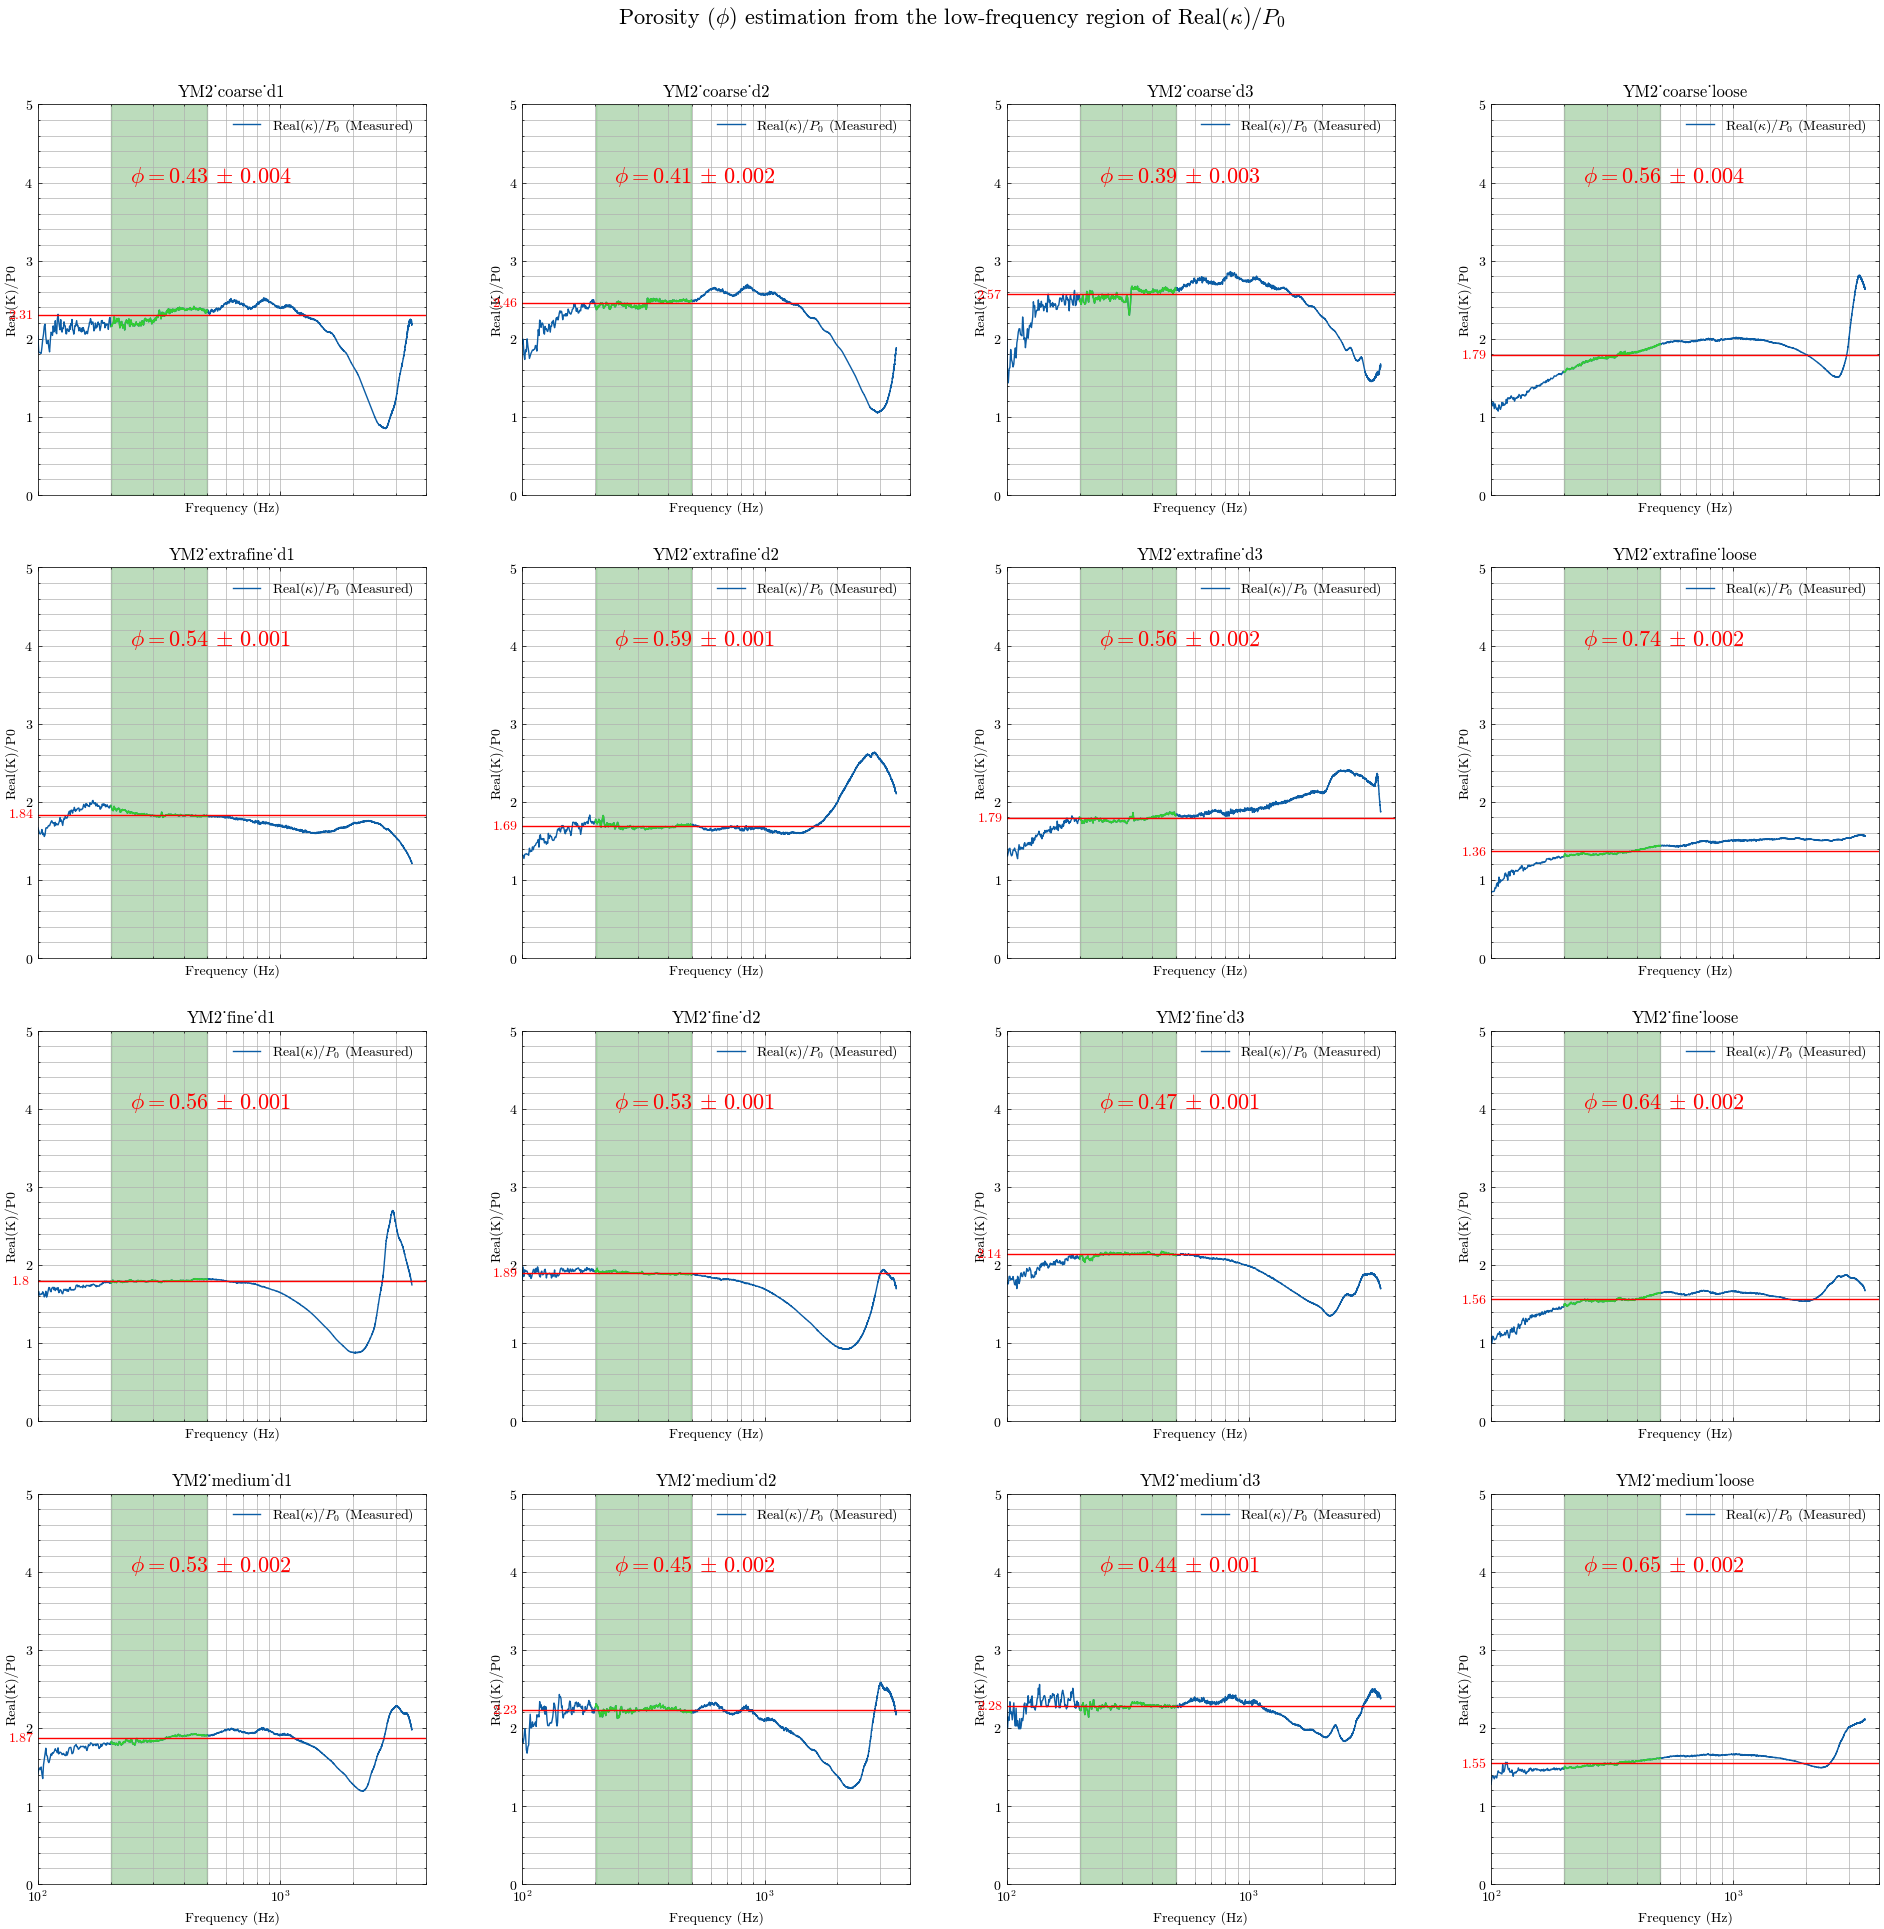

In [33]:

# For all the samples

fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True, sharey=False)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=4.5)

for i, axe in enumerate(ax):

    realK_avgdata = np.array(samples_abs_df.iloc[i]['real_K'])/p_atm     #Average real Kc
    imagK_avgdata = np.array(samples_abs_df.iloc[i]['imag_K'])/p_atm     #Average imag Kc
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    sample_name = samples_abs_df.index[i]

    # Frequency interval to analyse
    freq_start = 200 
    freq_end = 500

    index_start = np.where(freq==freq_start)[0][0]
    index_end = np.where(freq==freq_end)[0][0]

    interval_x = freq[(freq >= freq_start) & (freq <= freq_end)]
    interval_y = realK_avgdata[index_start:index_end+1]

    # Function to fit: a horizontal line (y = a) with a constant slope
    def horizontal_line(x, a):
        return a

    # Initial guess for the parameter 'a'
    p0 = np.mean(interval_y)

    # Fit the line to the interval data
    popt, pcov = curve_fit(horizontal_line, interval_x, interval_y, p0=p0)
    std_dev = np.sqrt(np.diag(pcov))

    porosity_estimated = round(1/round(popt[0],2),2)
    samples_abs_df.at[sample_name, 'porosity_estimated'] = float(porosity_estimated)

    axe.semilogx(freq, realK_avgdata, label=r'Real($\kappa$)/$P_{0}$ (Measured)')
    axe.semilogx(interval_x, interval_y, c='limegreen')
    #ax.semilogx(freq, line_fit, '--',c='r')
    axe.axhline(popt, color='red', alpha=1)
    
    cond1 = freq>freq_start
    cond2=  freq<freq_end
    comb_cond = cond1 & cond2 
    axe.fill_between(freq, 0, 5, where= comb_cond, color='forestgreen', alpha=0.3)
    axe.text(85, round(popt[0],2), f'${round(popt[0],2)}$', ha="center", va="center", c='r')
    axe.text(freq_start*1.2, 4, f'$\phi =${round(1/round(popt[0],2),2)} $\pm$ {round(std_dev[0],3)}', ha="left", va="baseline", c='r', fontsize=16)
    
    axe.grid(which='both')
    axe.set_xlim(100, 4000)
    axe.set_ylim(0, 5)
    axe.set_xlabel('Frequency (Hz)')
    axe.set_ylabel('Real(K)/P0')
    axe.set_title(f'{sample_name}')
    axe.legend()
fig.subplots_adjust(top=0.93)
fig.suptitle(r'Porosity ($\phi$) estimation from the low-frequency region of Real($\kappa$)/$P_{0}$',fontsize=16)
plt.show()

samples_abs_df.loc['YM2_extrafine_d1', 'porosity_estimated'] = 0.61 

In [34]:
samples_abs_df['porosity_estimated']

sample
YM2_coarse_d1          0.43
YM2_coarse_d2          0.41
YM2_coarse_d3          0.39
YM2_coarse_loose       0.56
YM2_extrafine_d1       0.61
YM2_extrafine_d2       0.59
YM2_extrafine_d3       0.56
YM2_extrafine_loose    0.74
YM2_fine_d1            0.56
YM2_fine_d2            0.53
YM2_fine_d3            0.47
YM2_fine_loose         0.64
YM2_medium_d1          0.53
YM2_medium_d2          0.45
YM2_medium_d3          0.44
YM2_medium_loose       0.65
Name: porosity_estimated, dtype: float64

### Static air-flow resistivity from the Imag($\rho_c$) --> Low-frequency limit

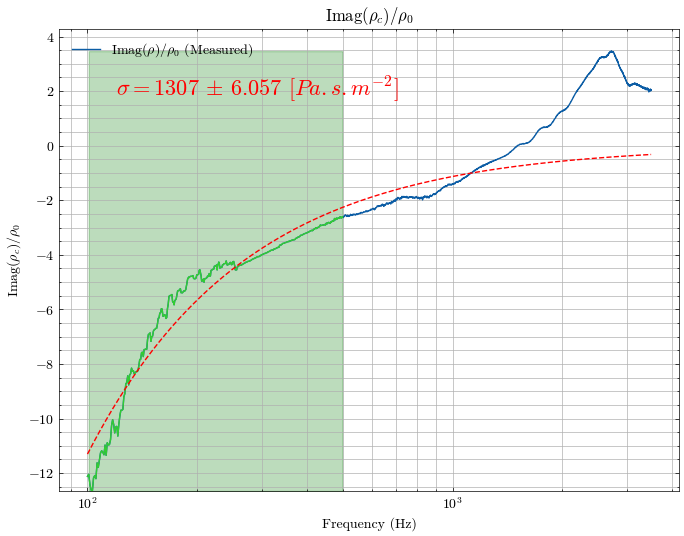

In [35]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

sample_selected = 'YM2_medium_d2'

realrho_avgdata = np.array(samples_abs_df.loc[sample_selected]['real_rho'])/rho0     #Average real Kc
imagrho_avgdata = np.array(samples_abs_df.loc[sample_selected]['imag_rho'])/rho0     #Average imag Kc

# Frequency interval to analyse
freq_start = 100 
freq_end = 500

index_start = np.where(freq==freq_start)[0][0]
index_end = np.where(freq==freq_end)[0][0]

interval_x = freq[(freq >= freq_start) & (freq <= freq_end)]
interval_y = imagrho_avgdata[index_start:index_end+1]

# Function to fit: 
def hyper_func(x, a):  #a=sigma/rho0
    return a/(-x)

# Fit the line to the interval data
popt, pcov = curve_fit(hyper_func, interval_x, interval_y)
std_dev = np.sqrt(np.diag(pcov))

ax.semilogx(freq, imagrho_avgdata, label=r'Imag($\rho$)/$\rho_{0}$ (Measured)')
ax.semilogx(interval_x, interval_y, c='limegreen')
ax.semilogx(freq, hyper_func(freq, *popt), '--',color='red', alpha=1)
cond1 = freq>freq_start
cond2=  freq<freq_end
comb_cond = cond1 & cond2 
ax.fill_between(freq, imagrho_avgdata.max(), imagrho_avgdata.min(), where=comb_cond, color='forestgreen', alpha=0.3)
pos_y=(imagrho_avgdata.max() - np.abs((imagrho_avgdata.max() - imagrho_avgdata.min()))*0.1)
ax.text(freq_start*1.2,pos_y , f'$\sigma =${round(popt[0]*rho0)} $\pm$ {round(std_dev[0]*rho0,3)} $[Pa.s.m^{{-2}}]$', ha="left", va="baseline", c='r', fontsize=16)

ax.grid(which='both')
#ax.set_xlim(100, 4000)
ax.set_ylim(imagrho_avgdata.min(), )
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel(r'Imag($\rho_{c}$)/$\rho_{0}$')
ax.set_title(r'Imag($\rho_{c}$)/$\rho_{0}$')
ax.legend()
plt.show()



In [36]:
# fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True, sharey=False)
# ax = ax.flatten()   #This line makes one index ax
# fig.tight_layout(pad=4.5)

# for i, axe in enumerate(ax):

#     realrho_avgdata = np.array(samples_abs_df.iloc[i]['real_rho'])/rho0     #Average real Kc
#     imagrho_avgdata = np.array(samples_abs_df.iloc[i]['imag_rho'])/rho0     #Average imag Kc
#     freq = np.array(samples_abs_df.iloc[i]['freq'])
#     sample_name = samples_abs_df.index[i]

#     # Frequency interval to analyse
#     freq_start = 100 
#     freq_end = 500

#     index_start = np.where(freq==freq_start)[0][0]
#     index_end = np.where(freq==freq_end)[0][0]

#     interval_x = freq[(freq >= freq_start) & (freq <= freq_end)]
#     interval_y = imagrho_avgdata[index_start:index_end+1]

#     # Function to fit: a horizontal line (y = a) with a constant slope
#     def hyper_func(x, a):  #a=sigma/rho0
#         return a/(-x)

#     # Fit the line to the interval data
#     popt, pcov = curve_fit(hyper_func, interval_x, interval_y)
#     std_dev = np.sqrt(np.diag(pcov))

#     axe.semilogx(freq, imagrho_avgdata, label=r'Imag($\rho$)/$\rho_{0}$ (Measured)')
#     axe.semilogx(interval_x, interval_y, c='limegreen')
#     axe.semilogx(freq, hyper_func(freq, *popt), '--',color='red', alpha=1)
#     cond1 = freq>freq_start
#     cond2=  freq<freq_end
#     comb_cond = cond1 & cond2 
#     axe.fill_between(freq, imagrho_avgdata.max(), imagrho_avgdata.min(), where=comb_cond, color='forestgreen', alpha=0.3)
#     pos_y=(imagrho_avgdata.max() - np.abs((imagrho_avgdata.max() - imagrho_avgdata.min()))*0.1)
#     axe.text(freq_start*1.2,pos_y , f'$\sigma =${round(popt[0]*rho0)} $\pm$ {round(std_dev[0]*rho0,3)} $[Pa.s.m^{{-2}}]$', ha="left", va="baseline", c='r', fontsize=16)

#     axe.grid(which='both')
#     #axe.set_xlim(100, 4000)
#     axe.set_ylim(imagrho_avgdata.min(), )
#     axe.set_xlabel('Frequency (Hz)')
#     axe.set_ylabel(r'Imag($\rho_{c}$)/$\rho_{0}$')
#     axe.set_title(f'{sample_name}')
#     axe.legend(loc='lower right', fontsize=8, frameon=False)
    

# fig.subplots_adjust(top=0.93)
# fig.suptitle(r'Static air-flow resistivity ($\sigma$) estimation from the low-frequency region of Imag($\rho_{c}$)/$\rho_{0}$',fontsize=16)
# plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


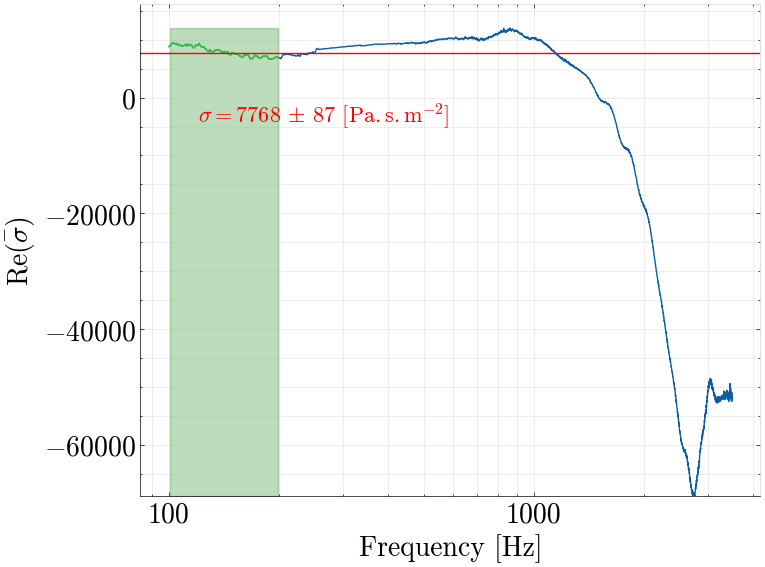

In [126]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

sample_selected = 'YM2_medium_d2'

realrho_avgdata = np.array(samples_abs_df.loc[sample_selected]['real_rho'])#/rho0     #Average real Kc
imagrho_avgdata = np.array(samples_abs_df.loc[sample_selected]['imag_rho'])#/rho0     #Average imag Kc
freq = np.array(samples_abs_df.loc[sample_selected]['freq'])
sample_name = sample_selected

rho_c = realrho_avgdata + 1j*imagrho_avgdata
dinamic_resistivity =  1j * (2*np.pi*freq)*(rho_c)  # Dynamic resistivity
re_din_res = np.real(dinamic_resistivity)  # Real part of dynamic resistivity

# Frequency interval to analyse
freq_start = 100 
freq_end = 200

index_start = np.where(freq==freq_start)[0][0]
index_end = np.where(freq==freq_end)[0][0]

interval_x = freq[(freq >= freq_start) & (freq <= freq_end)]
interval_y = re_din_res[index_start:index_end+1]

# Function to fit: a horizontal line (y = a) with a constant slope
def hyper_func(x, a):  #a=sigma/rho0
    return a

# Fit the line to the interval data
popt, pcov = curve_fit(hyper_func, interval_x, interval_y)
std_dev = np.sqrt(np.diag(pcov))

sigma_estimated = round(popt[0] * rho0)  # Estimated flow resistivity
samples_abs_df.at[sample_name, 'sigma_estimated'] = sigma_estimated

fontsize = 20

ax.semilogx(freq, re_din_res)  #, label=r'Real($\sigma_{dynamic}$) (Measured)')
ax.semilogx(interval_x, interval_y, c='limegreen')
ax.axhline(popt, color='red', alpha=1)
cond1 = freq>freq_start
cond2=  freq<freq_end
comb_cond = cond1 & cond2 
ax.fill_between(freq, re_din_res.max(), re_din_res.min(), where=comb_cond, color='forestgreen', alpha=0.3)
pos_y=(re_din_res.max() - np.abs((re_din_res.max() - re_din_res.min()))*0.2)
ax.text(freq_start*1.2,pos_y , f'$\sigma =${round(popt[0])} $\pm$ {round(std_dev[0]*rho0)}' r' [$\mathrm{Pa.s.m^{{-2}}}$]', ha="left", va="baseline", c='r', fontsize=16)

ax.grid(which='both', alpha=0.3)
#ax.set_xlim(100, 4000)
ax.set_ylim(re_din_res.min(), )
ax.set_xlabel('Frequency [Hz]', fontsize=fontsize)
ax.set_ylabel(r'Re($\overset{-}{\sigma}$)', fontsize=fontsize)
# ax.set_title(f'{sample_name}')
ax.legend(loc='lower right', fontsize=8, frameon=False)
ax.tick_params(axis='both', labelsize=fontsize)
ax.spines['right'].set_color('lightgrey')
ax.spines['top'].set_color('lightgrey')
ax.set_xticks([100, 1000])
ax.set_xticklabels([100, 1000])

fig.subplots_adjust(top=0.93)
# fig.suptitle(r'Static air-flow resistivity ($\sigma$) estimation from the low-frequency region of Imag($\rho_{c}$)/$\rho_{0}$',fontsize=16)
plt.show()


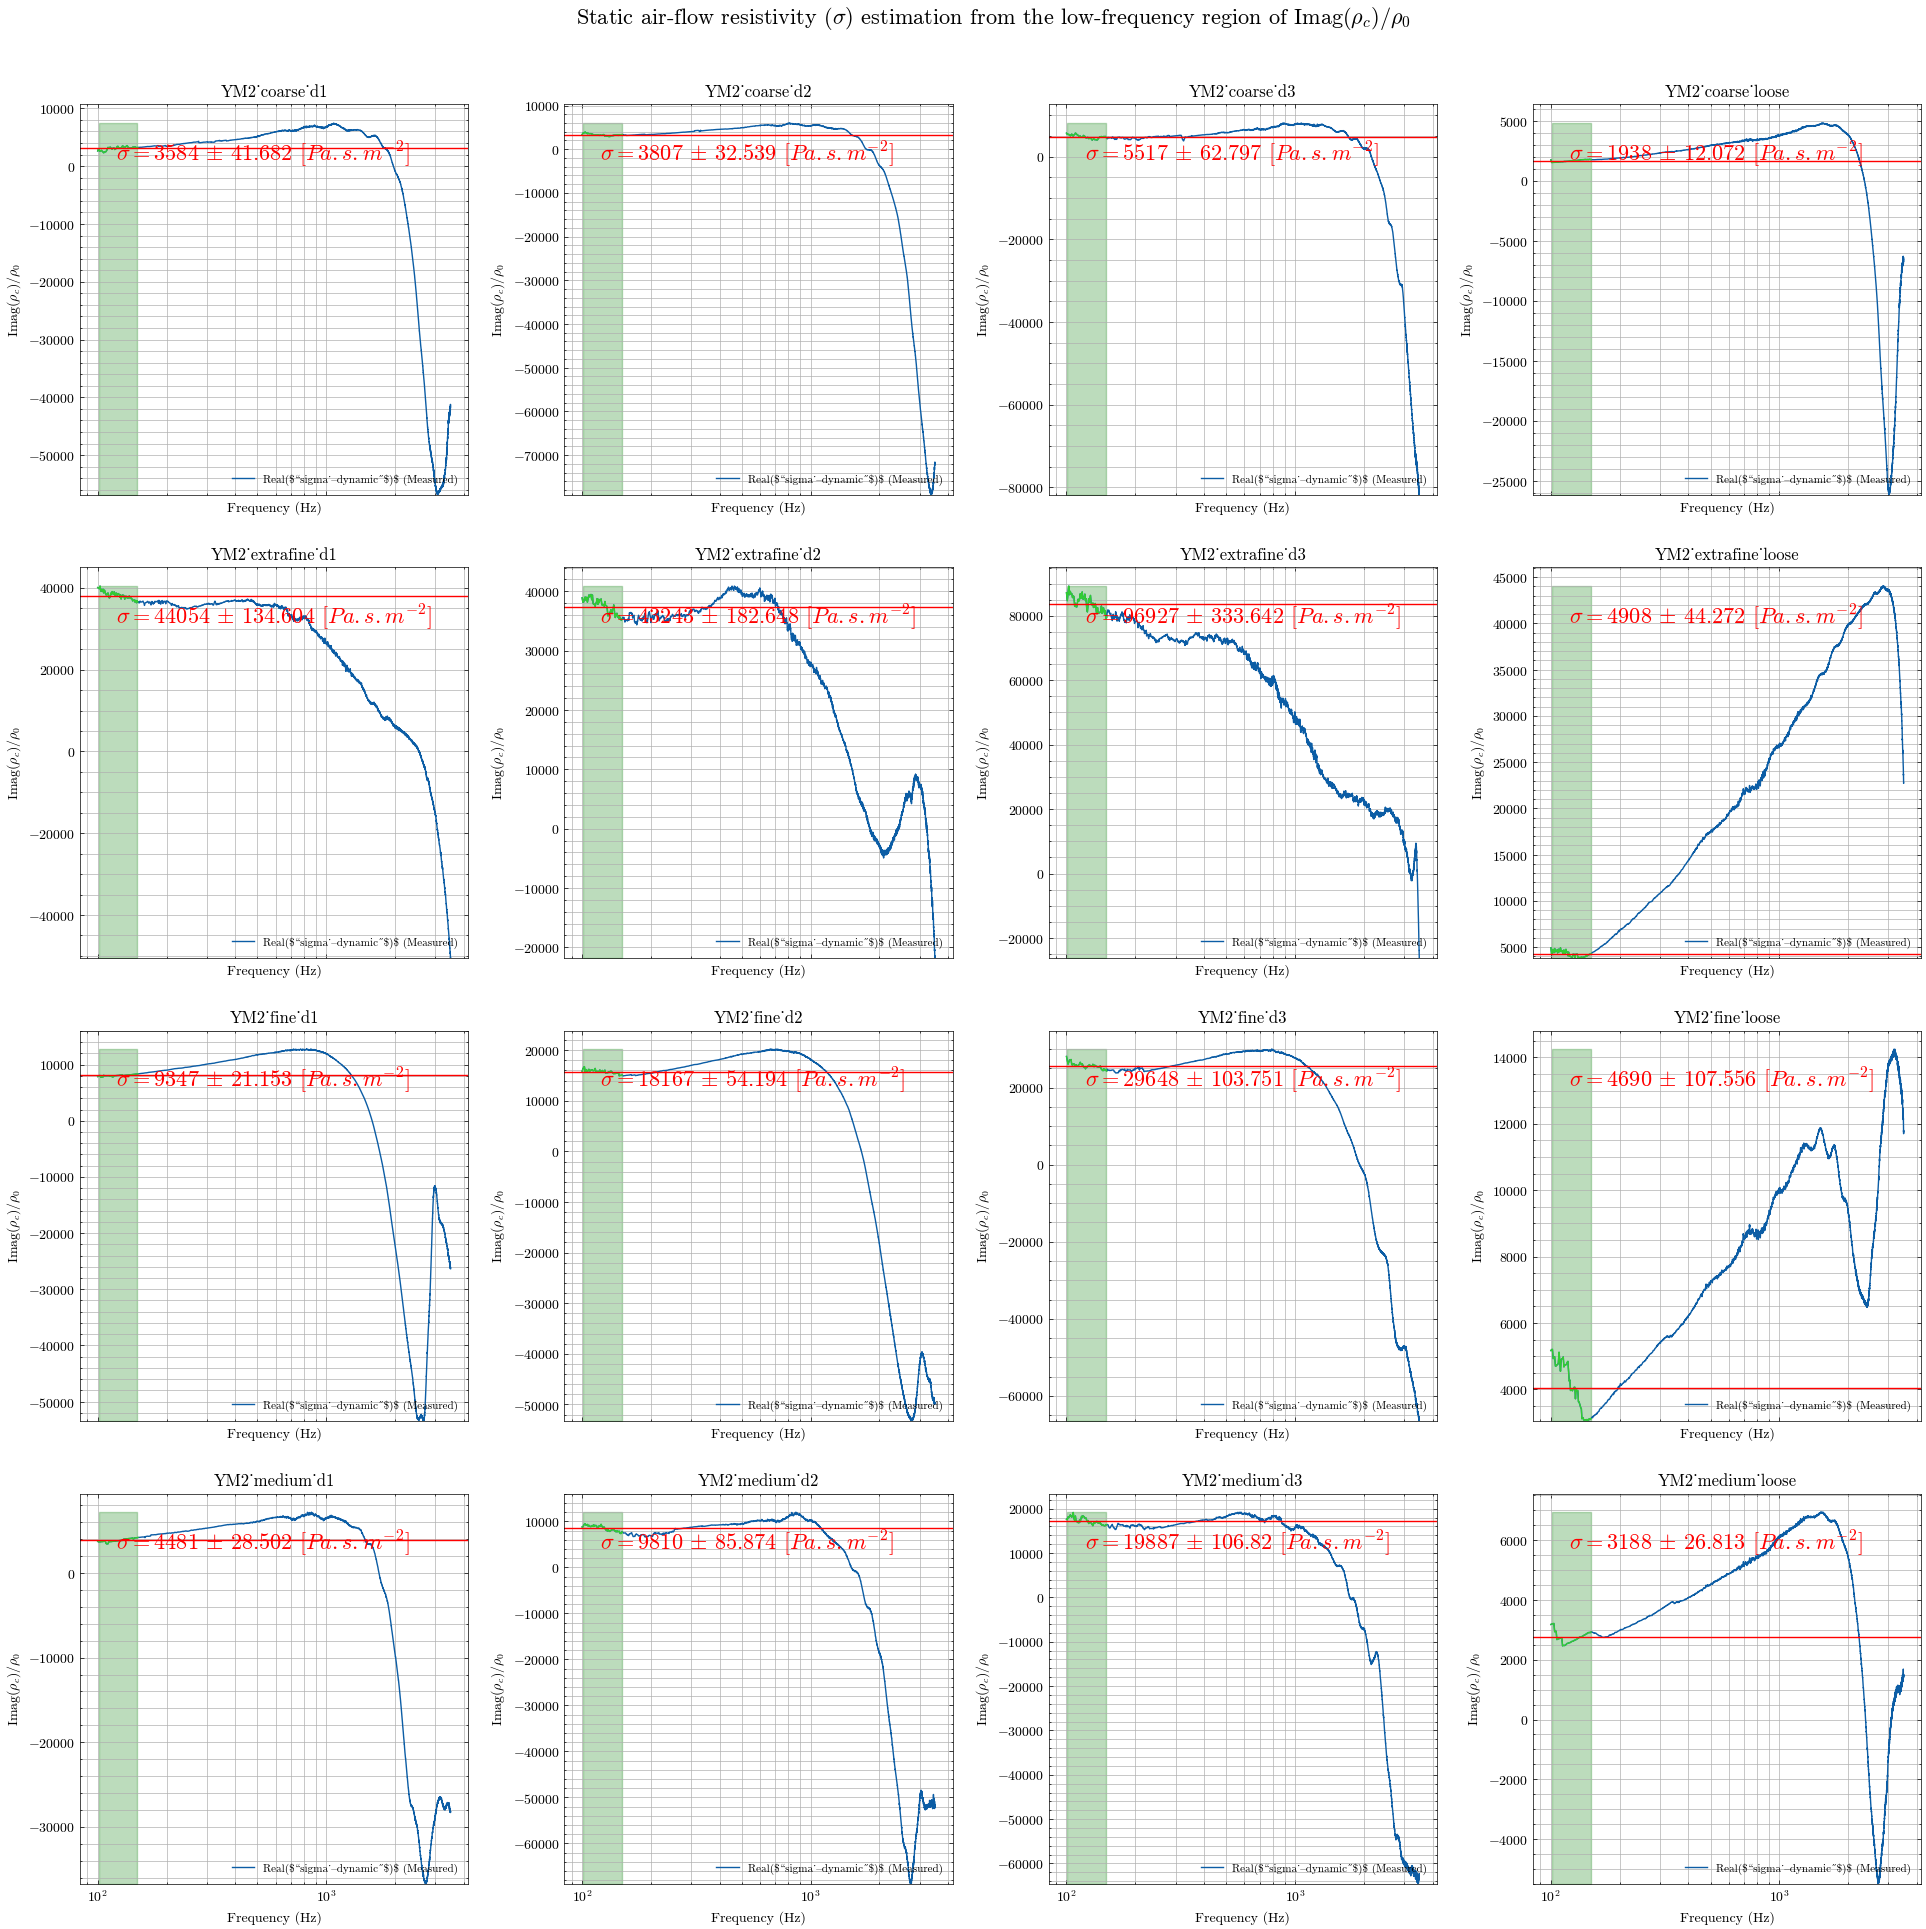

In [38]:
# FLOW RESISTIVITY ESTIMATION from low freq region Re(dynamic resistivity) (Panneton et al.)


fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True, sharey=False)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=4.5)

for i, axe in enumerate(ax):

    realrho_avgdata = np.array(samples_abs_df.iloc[i]['real_rho'])#/rho0     #Average real Kc
    imagrho_avgdata = np.array(samples_abs_df.iloc[i]['imag_rho'])#/rho0     #Average imag Kc
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    sample_name = samples_abs_df.index[i]

    rho_c = realrho_avgdata + 1j*imagrho_avgdata
    dinamic_resistivity =  1j * (2*np.pi*freq)*(rho_c)  # Dynamic resistivity
    re_din_res = np.real(dinamic_resistivity)  # Real part of dynamic resistivity

    # Frequency interval to analyse
    freq_start = 100 
    freq_end = 150

    index_start = np.where(freq==freq_start)[0][0]
    index_end = np.where(freq==freq_end)[0][0]

    interval_x = freq[(freq >= freq_start) & (freq <= freq_end)]
    interval_y = re_din_res[index_start:index_end+1]

    # Function to fit: a horizontal line (y = a) with a constant slope
    def hyper_func(x, a):  #a=sigma/rho0
        return a

    # Fit the line to the interval data
    popt, pcov = curve_fit(hyper_func, interval_x, interval_y)
    std_dev = np.sqrt(np.diag(pcov))

    sigma_estimated = round(popt[0] * rho0)  # Estimated flow resistivity
    samples_abs_df.at[sample_name, 'sigma_estimated'] = sigma_estimated

    
    axe.semilogx(freq, re_din_res, label=r'Real($\sigma_{dynamic}$)$ (Measured)')
    axe.semilogx(interval_x, interval_y, c='limegreen')
    axe.axhline(popt, color='red', alpha=1)
    cond1 = freq>freq_start
    cond2=  freq<freq_end
    comb_cond = cond1 & cond2 
    axe.fill_between(freq, re_din_res.max(), re_din_res.min(), where=comb_cond, color='forestgreen', alpha=0.3)
    pos_y=(re_din_res.max() - np.abs((re_din_res.max() - re_din_res.min()))*0.1)
    axe.text(freq_start*1.2,pos_y , f'$\sigma =${round(popt[0]*rho0)} $\pm$ {round(std_dev[0]*rho0,3)} $[Pa.s.m^{{-2}}]$', ha="left", va="baseline", c='r', fontsize=16)

    axe.grid(which='both')
    #axe.set_xlim(100, 4000)
    axe.set_ylim(re_din_res.min(), )
    axe.set_xlabel('Frequency (Hz)')
    axe.set_ylabel(r'Imag($\rho_{c}$)/$\rho_{0}$')
    axe.set_title(f'{sample_name}')
    axe.legend(loc='lower right', fontsize=8, frameon=False)
    

fig.subplots_adjust(top=0.93)
fig.suptitle(r'Static air-flow resistivity ($\sigma$) estimation from the low-frequency region of Imag($\rho_{c}$)/$\rho_{0}$',fontsize=16)
plt.show()

<Axes: xlabel='density', ylabel='sigma_measured'>

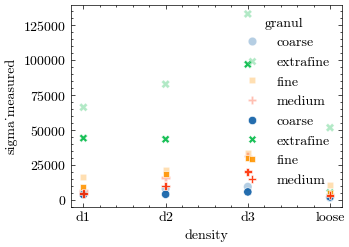

In [39]:
# RESISTIVITY VALUES MEASURED

sns.scatterplot(data=samples_abs_df, x='density', y='sigma_measured', hue='granul',  style='granul', sizes=(20, 200), alpha=0.3)
sns.scatterplot(data=samples_abs_df, x='density', y='sigma_estimated', hue='granul',  style='granul', sizes=(40, 400), alpha=0.9)


### Tortuosity estimated from the high-frequency region of the Real($\rho_{c}$)

$\alpha_{inf} = {\phi} * \Re(\rho_{c}/{\rho_{0}})$  when: ($\omega \rightarrow \infty$)   $\textit{(Inversion problems for.. Pompoli et al.)}$

In [40]:
# fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True, sharey=False)
# ax = ax.flatten()   #This line makes one index ax
# fig.tight_layout(pad=4.5)

# for i, axe in enumerate(ax):

#     realrho_avgdata = np.array(samples_abs_df.iloc[i]['real_rho'])/rho0     #Average real Kc
#     #imagrho_avgdata = np.array(samples_abs_df.iloc[i]['imag_rho'])/rho0     #Average imag Kc
#     freq = np.array(samples_abs_df.iloc[i]['freq'])
#     sample_name = samples_abs_df.index[i]

#     # Frequency interval to analyse
#     freq_start = 100 
#     freq_end = 2000

#     index_start = np.where(freq==freq_start)[0][0]
#     index_end = np.where(freq==freq_end)[0][0]

#     interval_x = freq[(freq >= freq_start) & (freq <= freq_end)]
#     interval_y = realrho_avgdata[index_start:index_end+1]

#     # Function to fit
#     def exp_func(x, a, b, c): 
#         return a * np.exp(-b * x) + c
#         #return a*x**2 + b*x + c
        

#     # Fit in the interval data
#     popt, pcov = curve_fit(exp_func, interval_x, interval_y, p0=[50.5, 0.002, 12])
#     std_dev = np.sqrt(np.diag(pcov))

#     freq2 = np.linspace(100, 10000, 10)
    
#     axe.semilogx(freq, realrho_avgdata, label=r'Real($\rho_{c}$)/$\rho_{0}$ (Measured)')
#     axe.semilogx(interval_x, interval_y, c='limegreen')
#     axe.semilogx(freq2, exp_func(freq2, *popt), '--',color='red', alpha=1)
#     cond1 = freq>freq_start
#     cond2=  freq<freq_end
#     comb_cond = cond1 & cond2 
#     axe.fill_between(freq, realrho_avgdata.max(), 0, where=comb_cond, color='forestgreen', alpha=0.3)
#     pos_y=(realrho_avgdata.max() - np.abs((realrho_avgdata.max() - realrho_avgdata.min()))*0.2)
    
#     value=round(exp_func(freq2[-1], *popt),2)
#     axe.text(freq_start*3, pos_y, r'$\alpha_{\infty} = $'f'{round(value*0.45, 2)}', ha="left", va="baseline", c='r', fontsize=16)
#     axe.text(freq2[-1], value*1.1, f'${value}$', ha="left", va="center", c='r')

#     axe.grid(which='both')
#     axe.set_ylim(0,None)
#     #axe.set_xscale('linear')
#     #axe.set_ylim(realrho_avgdata.min(), )
#     axe.set_xlabel('Frequency (Hz)')
#     axe.set_ylabel(r'Real($\rho_{c}$)/$\rho_{0}$')
#     axe.set_title(f'{sample_name}')
#     axe.legend()
# fig.subplots_adjust(top=0.93)
# fig.suptitle(r'Tortuosity ($\alpha_{\infty}$) estimation from the high-frequency region of Real($\rho_{c}$)/$\rho_{0}$',fontsize=16)
# plt.show()

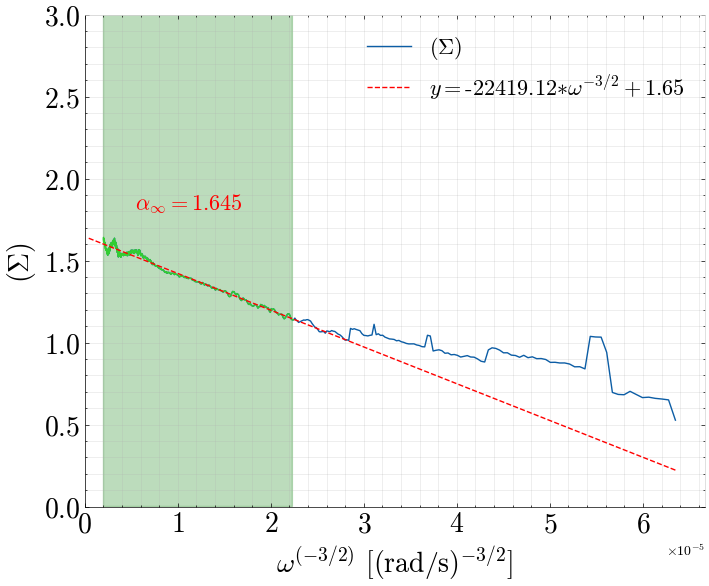

YM2_medium_d1 --> lambda: 101.6


In [122]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

sample_selected = 'YM2_medium_d1'

realrho_avgdata = np.array(samples_abs_df.loc[sample_selected]['real_rho'])#/rho0     #Average real Kc
imagrho_avgdata = np.array(samples_abs_df.loc[sample_selected]['imag_rho'])#/rho0     #Average imag Kc
porosity = np.array(samples_abs_df.loc[sample_selected]['porosity_estimated'])
freq = np.array(samples_abs_df.loc[sample_selected]['freq'])
sample_name = sample_selected

rho_ = realrho_avgdata + 1j*imagrho_avgdata
omega = 2*np.pi*freq
omega_prima = (omega**(-3/2))

suma = (porosity/rho0) * (np.real(rho_) + np.imag(rho_))  # extrapolation

# Frequency interval to analyse
freq_start = (2*np.pi*200)**(-3/2)
freq_end = (2*np.pi*1000)**(-3/2)

index_start = np.where(omega_prima==freq_start)[0][0]
index_end = np.where(omega_prima==freq_end)[0][0]

interval_x = omega_prima[(omega_prima <= freq_start) & (omega_prima >= freq_end)]
interval_y = suma[index_start:index_end+1]

# Function to fit
def line(x, a, b, c): 
    return -a * (x) - b 
    

# Fit in the interval data
popt, pcov = curve_fit(line, interval_x, interval_y)
std_dev = np.sqrt(np.diag(pcov))
line_fit = line(omega_prima, *popt)

freq2 = np.linspace(100, 10000, 10)

fontsize=20

idx_cut = (omega_prima>(2*np.pi*900)**(-3/2))
ax.plot(omega_prima[idx_cut], suma[idx_cut], label=r'($\Sigma$)')
#ax.plot(omega_prima, suma, label=r'($\Sigma$)')
ax.plot(interval_x, interval_y, c='limegreen')
ax.plot(omega_prima, line_fit, '--',color='red', alpha=1, label= r'$ y = $' f'{-round(popt[0],2)}' r'$ * \omega^{-3/2}  + $' f'{round(np.abs(popt[1]), 2)}')
cond1 = omega_prima<freq_start
cond2=  omega_prima>freq_end
comb_cond = cond1 & cond2 
ax.fill_between(omega_prima, suma.max()*1.2, suma.min()*0, where=comb_cond, color='forestgreen', alpha=0.3)
pos_y=(suma.max() - np.abs((suma.max() - suma.min()))*0.2)

alpha_inf2 = round(np.abs(popt[1]), 3)

ax.text(freq_end*2.7, alpha_inf2*1.1, r'$\alpha_{\infty} = $' f'{alpha_inf2}', ha="left", va="baseline", c='r', fontsize=16)

interval_x_omega = (interval_x**(-2/3))
interval_x_freq = (interval_x**(-2/3))/(2*np.pi)
validity_condition = popt[0]**(2/3)
#print(f'Validity condition: omega > m^(2/3)={validity_condition}')
#print(f'omega min: {min(interval_x_omega)} , omega max: {max(interval_x_omega)}')
#print(f'freq min: {min(interval_x_freq)} , freq max: {max(interval_x_freq)}')
passed = (interval_x_omega > validity_condition).any()
#print(f'Condition fulfilled: {passed}')
#print(f'Tortuosity = {alpha_inf2}')

samples_abs_df.at[sample_name, 'tortuosity_estimated'] = alpha_inf2

# Viscous characeteristic length anaylitical formula: (Panneton)
m = popt[0]
poros = samples_abs_df.loc[sample_selected]['porosity_estimated']
sigma = samples_abs_df.loc[sample_selected]['sigma_estimated']
lamb = m*alpha_inf2*np.sqrt((8*eta*rho0**3) / ((sigma**4) * (poros**4)))

# ax.text(freq_end*0.2, 2.6, f'Condition fulfilled: {passed}', ha="left", va="baseline", c='forestgreen', fontsize=12)

ax.grid(which='both', alpha=0.3)
ax.set_xlim(0, )
#ax.set_ylim(suma.min(), suma.max())
ax.set_ylim(0, 3)
ax.set_xlabel(r'$\omega^{(-3/2)}$ [$\mathrm{(rad/s)^{-3/2}}$]', fontsize=fontsize)
ax.set_ylabel(r'($\Sigma$) ', fontsize=fontsize)
# ax.set_title(f'{sample_name}')
# ax.set_title(r'Function ($\Sigma$)')
ax.legend(fontsize=fontsize-4)
ax.tick_params(axis='both', labelsize=fontsize)
ax.spines['right'].set_color('lightgrey')
ax.spines['top'].set_color('lightgrey')


fig.subplots_adjust(top=0.93)
# fig.suptitle(r'Tortuosity ($\alpha_{\infty}$) estimation from the high-frequency region of Real($\rho_{c}$)/$\rho_{0}$',fontsize=16)
plt.show()

print(f'{sample_name} --> lambda: {round(lamb*1e6, 2) }')


YM2_coarse_d1 --> lambda: 82.77 valid: True
YM2_coarse_d2 --> lambda: 60.91 valid: True
YM2_coarse_d3 --> lambda: 42.64 valid: True
YM2_coarse_loose --> lambda: 58.82 valid: True
YM2_extrafine_d1 --> lambda: 33.37 valid: True
YM2_extrafine_d2 --> lambda: 20.52 valid: True
YM2_extrafine_d3 --> lambda: nan valid: False
YM2_extrafine_loose --> lambda: -253.5 valid: False
YM2_fine_d1 --> lambda: 47.94 valid: True
YM2_fine_d2 --> lambda: 39.2 valid: True
YM2_fine_d3 --> lambda: 33.19 valid: True
YM2_fine_loose --> lambda: -28.72 valid: False
YM2_medium_d1 --> lambda: 75.43 valid: True


C:\Users\joaqu\AppData\Local\Temp\ipykernel_367760\2951185158.py:100: RuntimeWarning: invalid value encountered in sqrt
  lamb = m*alpha_inf2*np.sqrt((8*eta*rho0**3) / ((sigma**4) * (poros**4)))
C:\Users\joaqu\AppData\Local\Temp\ipykernel_367760\2951185158.py:66: RuntimeWarning: invalid value encountered in scalar power
  validity_condition = popt[0]**(2/3)


YM2_medium_d2 --> lambda: 64.88 valid: True
YM2_medium_d3 --> lambda: 49.0 valid: True
YM2_medium_loose --> lambda: 37.08 valid: True


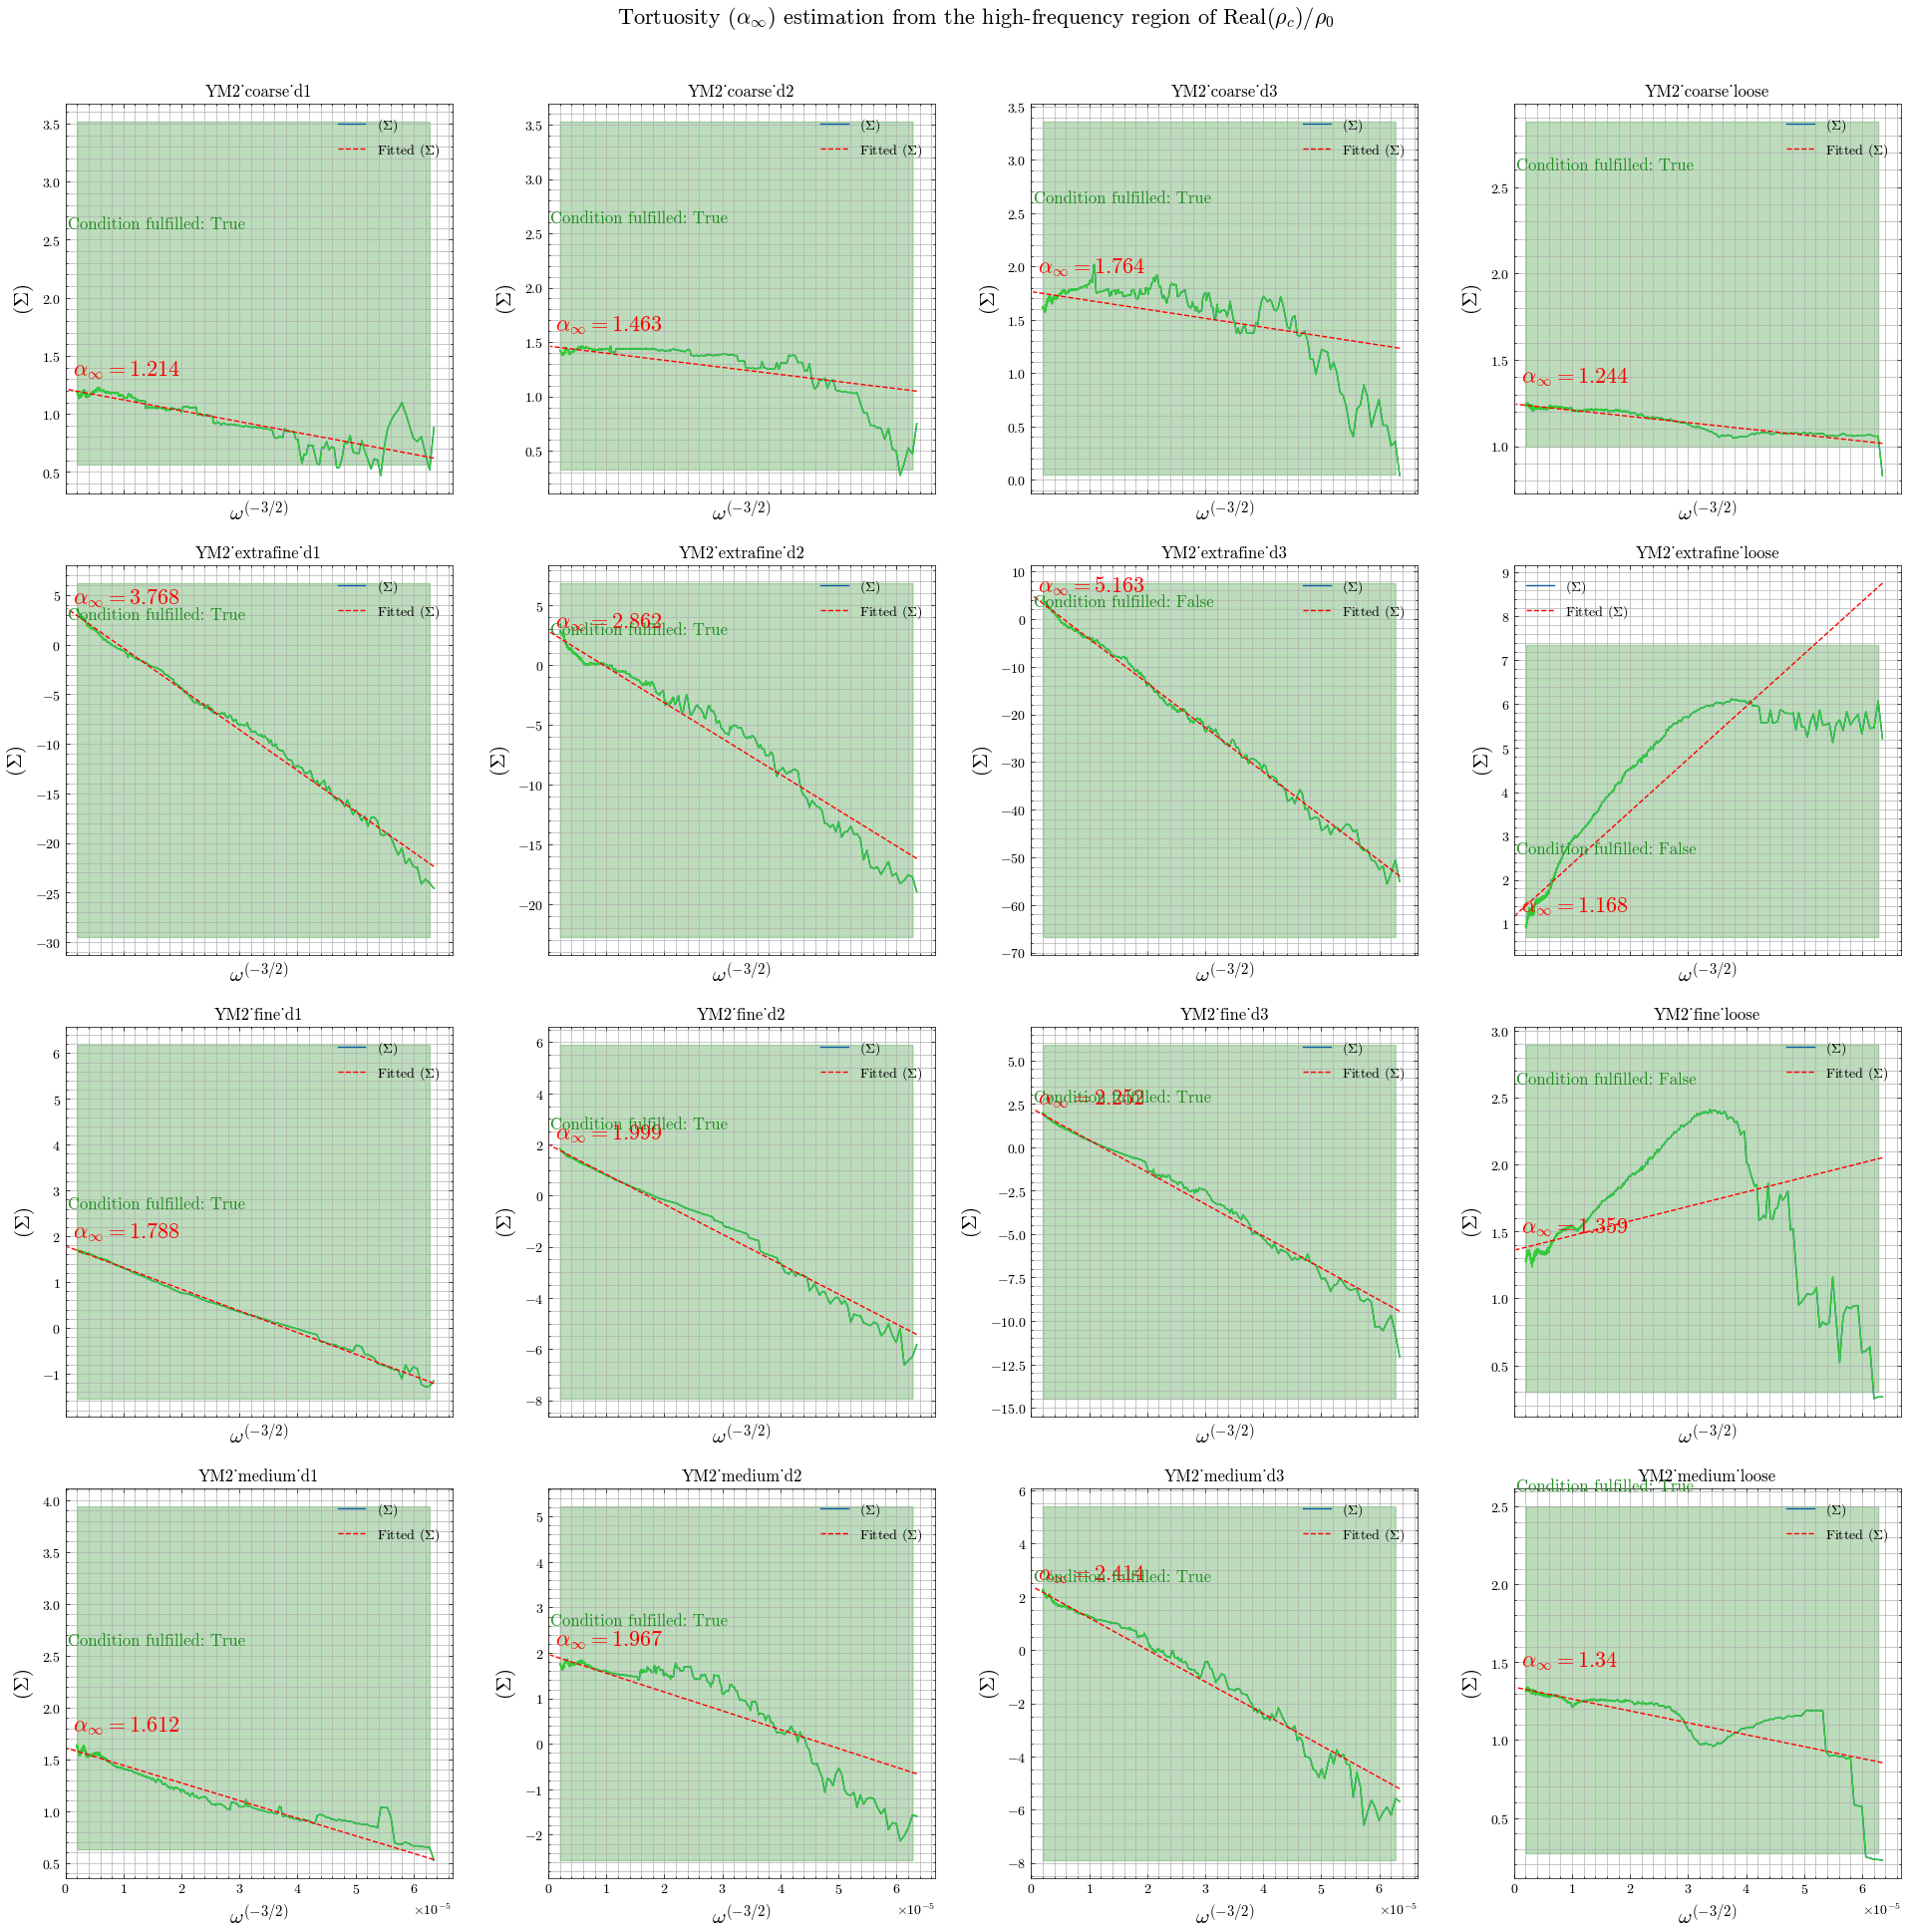

In [42]:
# TORTUOSITY FROM SYGMA FUNCTION


fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True, sharey=False)
ax = ax.flatten()   #This line makes one index ax
fig.tight_layout(pad=4.5)

for i, axe in enumerate(ax):

    realrho_avgdata = np.array(samples_abs_df.iloc[i]['real_rho'])#/rho0     #Average real Kc
    imagrho_avgdata = np.array(samples_abs_df.iloc[i]['imag_rho'])#/rho0     #Average imag Kc
    porosity = np.array(samples_abs_df.iloc[i]['porosity_estimated'])
    freq = np.array(samples_abs_df.iloc[i]['freq'])
    sample_name = samples_abs_df.index[i]

    rho_ = realrho_avgdata + 1j*imagrho_avgdata
    omega = 2*np.pi*freq
    omega_prima = (omega**(-3/2))

    suma = (porosity/rho0) * (np.real(rho_) + np.imag(rho_))  # extrapolation of this function
    
    # Analytical formula: (Panneton)
    
    
    # Frequency interval to analyse
    freq_inf = 100
    freq_sup = 1000
    
    freq_start = (2*np.pi*freq_inf)**(-3/2)
    freq_end = (2*np.pi*freq_sup)**(-3/2)

    index_start = np.where(omega_prima==freq_start)[0][0]
    index_end = np.where(omega_prima==freq_end)[0][0]

    interval_x = omega_prima[(omega_prima <= freq_start) & (omega_prima >= freq_end)]
    interval_y = suma[index_start:index_end+1]

    # Function to fit
    def line(x, a, b, c): 
        return -a * (x) - b 

    # Fit in the interval data
    popt, pcov = curve_fit(line, interval_x, interval_y)
    std_dev = np.sqrt(np.diag(pcov))
    line_fit = line(omega_prima, *popt)

    freq2 = np.linspace(100, 10000, 10)
    
    freq_cut = 900
    idx_cut = (omega_prima>(2*np.pi*freq_cut)**(-3/2))
    axe.plot(omega_prima[idx_cut], suma[idx_cut], label=r'($\Sigma$)')
    #axe.plot(omega_prima, suma, label=r'($\Sigma$)')
    axe.plot(interval_x, interval_y, c='limegreen')
    axe.plot(omega_prima, line_fit, '--',color='red', alpha=1, label='Fitted ($\Sigma$)')
    cond1 = omega_prima<freq_start
    cond2=  omega_prima>freq_end
    comb_cond = cond1 & cond2 
    axe.fill_between(omega_prima, suma.max()*1.2, suma.min()*1.2, where=comb_cond, color='forestgreen', alpha=0.3)
    pos_y=(suma.max() - np.abs((suma.max() - suma.min()))*0.2)

    alpha_inf2 = round(np.abs(popt[1]), 3)
    axe.text(freq_end*0.6, alpha_inf2*1.1, r'$\alpha_{\infty} = $' f'{alpha_inf2}', ha="left", va="baseline", c='r', fontsize=16)

    interval_x_omega = (interval_x**(-2/3))
    interval_x_freq = (interval_x**(-2/3))/(2*np.pi)
    validity_condition = popt[0]**(2/3)
    #print(f'Validity condition: omega > m^(2/3)={validity_condition}')
    #print(f'omega min: {min(interval_x_omega)} , omega max: {max(interval_x_omega)}')
    #print(f'freq min: {min(interval_x_freq)} , freq max: {max(interval_x_freq)}')
    passed = (interval_x_omega > validity_condition).any()
    #print(f'Condition fulfilled: {passed}')
    #print(f'Tortuosity = {alpha_inf2}')
    
    if sample_name =='YM2_extrafine_loose':
        alpha_inf2 = 1.8
    if sample_name =='YM2_extrafine_d3':
        alpha_inf2 = 3.51
    if sample_name =='YM2_medium_d3':
        alpha_inf2 = 2.01
    if sample_name =='YM2_coarse_d3':
        alpha_inf2 = 1.52
    if sample_name =='YM2_coarse_d1':
        alpha_inf2 = 1.35
    if sample_name =='YM2_fine_loose':
        alpha_inf2 = 1.53
        
    # samples_abs_df.loc['YM2_extrafine_loose','tortuosity_estimated'] = 1.8
    # samples_abs_df.loc['YM2_extrafine_d3','tortuosity_estimated'] = 3.51
    # samples_abs_df.loc['YM2_medium_d3','tortuosity_estimated'] = 2.01
    # samples_abs_df.loc['YM2_coarse_d3','tortuosity_estimated'] = 1.52
    # samples_abs_df.loc['YM2_coarse_d1','tortuosity_estimated'] = 1.35
    # samples_abs_df.loc['YM2_fine_loose','tortuosity_estimated'] = 1.53
    
    samples_abs_df.at[sample_name, 'tortuosity_estimated'] = alpha_inf2
    
    # Viscous characeteristic length anaylitical formula: (Panneton)
    m = popt[0]
    poros = samples_abs_df.iloc[i]['porosity_estimated']
    sigma = samples_abs_df.iloc[i]['sigma_estimated']
    lamb = m*alpha_inf2*np.sqrt((8*eta*rho0**3) / ((sigma**4) * (poros**4)))
    
    if passed == True:
        samples_abs_df.at[sample_name, 'lambda_analytical'] = round(lamb*1e6, 2)
    else:
        samples_abs_df.at[sample_name, 'lambda_analytical'] = np.nan

    axe.text(freq_end*0.2, 2.6, f'Condition fulfilled: {passed}', ha="left", va="baseline", c='forestgreen', fontsize=12)

    axe.grid(which='both')
    axe.set_xlim(0, )
    #axe.set_ylim(suma.min(), suma.max())
    #axe.set_ylim(0, 2)
    axe.set_xlabel(r'$\omega^{(-3/2)}$', fontsize=15)
    axe.set_ylabel(r'($\Sigma$)', fontsize=15)
    axe.set_title(f'{sample_name}')
    # ax.set_title(r'Function ($\Sigma$)')
    axe.legend()
    
    print(f'{sample_name} --> lambda: {round(lamb*1e6, 2) } valid: {passed}')

fig.subplots_adjust(top=0.93)
fig.suptitle(r'Tortuosity ($\alpha_{\infty}$) estimation from the high-frequency region of Real($\rho_{c}$)/$\rho_{0}$',fontsize=16)
plt.show()

In [17]:
realrho_avgdata

array(1)

In [18]:
# TORTUOSITY ANALYTICAL FORMULA

# fig, ax = plt.subplots(nrows, ncols, figsize=(rowsize,colsize), squeeze=False, sharex=True, sharey=False)
# ax = ax.flatten()   #This line makes one index ax
# fig.tight_layout(pad=4.5)

# for i, axe in enumerate(ax):

#     realrho_avgdata = np.array(samples_abs_df.iloc[i]['real_rho'])#/rho0     #Average real Kc
#     imagrho_avgdata = np.array(samples_abs_df.iloc[i]['imag_rho'])#/rho0     #Average imag Kc
#     porosity = np.array(samples_abs_df.iloc[i]['porosity_estimated'])
#     sigma = np.array(samples_abs_df.iloc[i]['sigma_estimated'])
#     freq = np.array(samples_abs_df.iloc[i]['freq'])
#     sample_name = samples_abs_df.index[i]
#     omega = 2*np.pi*freq
    
    
#     alpha_inf_analytical = (porosity/rho0) * (realrho_avgdata - np.sqrt(imagrho_avgdata**2 - (sigma / omega)**2)) 
#     print(alpha_inf_analytical)
    
#     axe.plot(freq, alpha_inf_analytical)
    
#     axe.grid(which='both')
#     #axe.set_xlim(0, )
#     #axe.set_ylim(suma.min(), suma.max())
#     axe.set_ylim(0, 4)
#     axe.set_xlabel(r'Frequency (Hz)$', fontsize=15)
#     axe.set_ylabel(r'($\alpha$)', fontsize=15)
#     axe.set_title(f'{sample_name}')
#     # ax.set_title(r'Function ($\Sigma$)')
#     axe.legend()
    
    
    


In [19]:
# Order and fix
custom_order = ['d0', 'd1', 'd2', 'd3']
samples_abs_df.loc[samples_abs_df['density'] == 'loose', 'density'] = 'd0'
samples_abs_df['density'] = pd.Categorical(samples_abs_df['density'], categories=custom_order, ordered=True)

samples_abs_df.index

Index(['YM2_coarse_d1', 'YM2_coarse_d2', 'YM2_coarse_d3', 'YM2_coarse_loose',
       'YM2_extrafine_d1', 'YM2_extrafine_d2', 'YM2_extrafine_d3',
       'YM2_extrafine_loose', 'YM2_fine_d1', 'YM2_fine_d2', 'YM2_fine_d3',
       'YM2_fine_loose', 'YM2_medium_d1', 'YM2_medium_d2', 'YM2_medium_d3',
       'YM2_medium_loose'],
      dtype='object', name='sample')

R-squared: 0.83
gamma: 0.41
R-squared: 0.95
gamma: 0.82
R-squared: 0.96
gamma: 1.06
R-squared: 0.67
gamma: 2.24


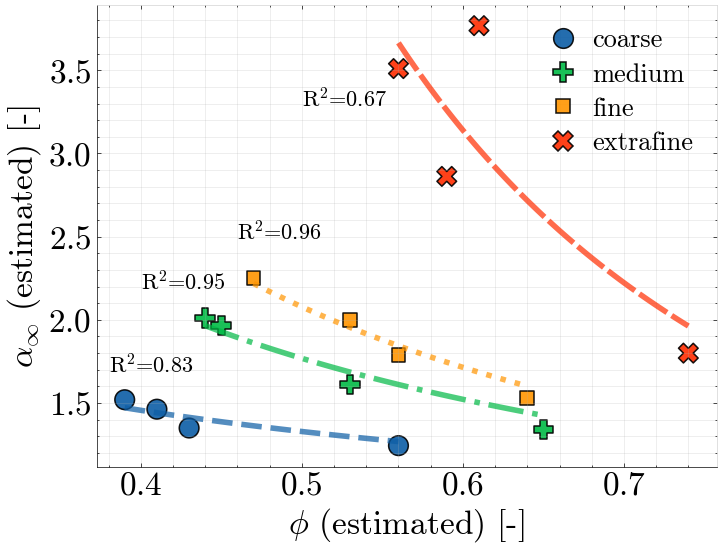

In [118]:
# TORTUOSITY ANALYTICAL FORMULA OVER POROSITY ESTIMATION (Archie's law)

# alpha_inf_analytical = (1/porosity) ^ gamma  where gamma is a constant obtained by fitting (Archie's law)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

custom_order_granul = ['coarse', 'medium', 'fine', 'extrafine']
fontsize=24

xpos = [0.38, 0.4, 0.46, 0.5]
ypos = [1.8, 2.3, 2.6, 3.4]

markers = ['o', 's', 'D', '^']
linestyles = ['dashed', 'dashdot', 'dotted', (0, (6, 1))]

ax = sns.scatterplot(data=samples_abs_df, x='porosity_estimated', y='tortuosity_estimated', legend='brief' , s=200, sizes=(200, 400), edgecolor='black',hue='granul', hue_order=['coarse', 'medium', 'fine', 'extrafine'] ,style='granul', alpha=0.9)

for i, granul in enumerate(custom_order_granul):
    # if granul == 'extrafine':
    #     continue
    gran_samples = samples_abs_df[samples_abs_df['granul'] == granul]
    gran_samples = gran_samples.sort_values(by='density', ascending=True)
    porosity_estimated = gran_samples['porosity_estimated']
    tortuosity_estimated = gran_samples['tortuosity_estimated']
    
    granul_label = granul.capitalize()
    
    # ax.scatter(porosity_estimated, tortuosity_estimated, label=granul_label, s=100, alpha=0.7)
    
    interval_x = porosity_estimated  # Porosity values
    interval_y = tortuosity_estimated # Tortuosity values

    # Function to fit
    def archieslaw(x, gamma): 
        return (1/x)**(gamma)  
        
    # Fit in the interval data
    popt, pcov = curve_fit(archieslaw, interval_x, interval_y)
    std_dev = np.sqrt(np.diag(pcov))
    # print(f'Granul: {granul}, Gamma: {popt[0]}, Std Dev: {std_dev[0]}')
    # print(gran_samples['density'])
    
    
    # Compute the fitted y-values
    fitted_y = archieslaw(interval_x, *popt)
    # Calculate residuals
    residuals = interval_y - fitted_y
    # Residual sum of squares
    ss_res = np.sum(residuals**2)
    # Total sum of squares
    ss_tot = np.sum((interval_y - np.mean(interval_y))**2)
    # R-squared
    r_squared = round(1 - (ss_res / ss_tot), 2)
    r2_label = r'$\mathrm{R^2}$=' f'{r_squared:.2f}'

    print("R-squared:", r_squared)
    print(f'gamma: {round(popt[0] ,2)}')

    xmax = interval_x.max()
    xmin = interval_x.min()

    xinterval = np.linspace(xmin, xmax, 100)  # Porosity range for plotting the fit
    
    ax.plot(xinterval, archieslaw(xinterval, *popt), linestyle=linestyles[i],linewidth=4, alpha=0.7)  #label=f'Fit ' r'($R^2$='f'{r_squared})'
    ax.text(xpos[i], ypos[i], r2_label, fontsize=16, verticalalignment='top')
    ax.set_xlabel(r'$\phi$ (estimated) [-]', fontsize=fontsize)
    ax.set_ylabel(r'$\alpha_{\infty}$ (estimated) [-]', fontsize=fontsize)
    
    legend =ax.legend(fontsize=fontsize-5, labelspacing=0.4,  handletextpad=0.1, loc='best', markerscale=1, ncol=1)
    legend.set_frame_on(False)
    #ax.set_ylim(0, 3)
    ax.grid(which='both', alpha=0.3)

    ax.tick_params(axis='both', labelsize=fontsize)
    ax.spines['right'].set_color('lightgrey')
    ax.spines['top'].set_color('lightgrey')



sample
YM2_coarse_d1          82.77
YM2_coarse_d2          60.91
YM2_coarse_d3          42.64
YM2_coarse_loose       58.82
YM2_extrafine_d1       33.37
YM2_extrafine_d2       20.52
YM2_extrafine_d3         NaN
YM2_extrafine_loose      NaN
YM2_fine_d1            47.94
YM2_fine_d2            39.20
YM2_fine_d3            33.19
YM2_fine_loose           NaN
YM2_medium_d1          75.43
YM2_medium_d2          64.88
YM2_medium_d3          49.00
YM2_medium_loose       37.08
Name: lambda_analytical, dtype: float64

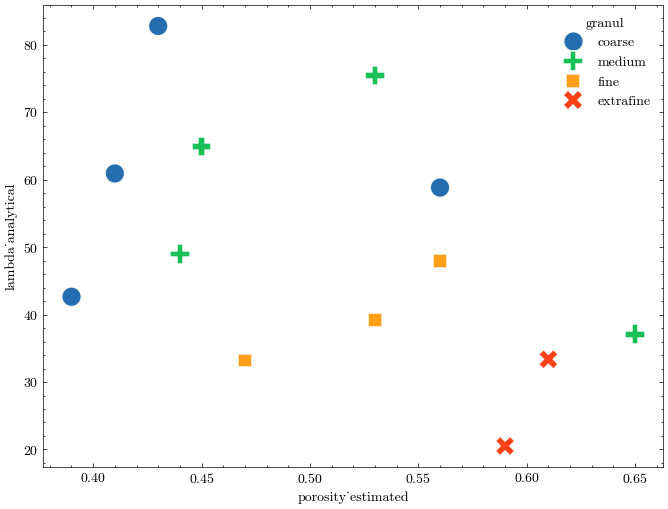

In [45]:
# Viscous characteristic length

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

custom_order_granul = ['coarse', 'medium', 'fine', 'extrafine']

markers = ['o', 's', 'D', '^']
linestyles = ['dashed', 'dashdot', 'dotted', (0, (6, 1))]

ax = sns.scatterplot(data=samples_abs_df, x='porosity_estimated', y='lambda_analytical', legend='brief' , s=200, sizes=(200, 400), hue='granul', hue_order=['coarse', 'medium', 'fine', 'extrafine'] ,style='granul', alpha=0.9)
samples_abs_df['lambda_analytical']

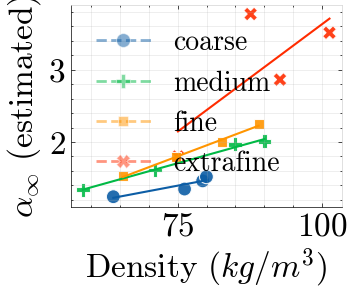

In [46]:
# TORTUOSITY

custom_order = ['loose', 'd1', 'd2', 'd3']

custom_order_granul = ['coarse', 'medium', 'fine', 'extrafine']

ax = sns.scatterplot(data=samples_abs_df, x='dens_value', y='tortuosity_estimated', legend='brief' , s=100, sizes=(200, 400), hue='granul', hue_order=['coarse', 'medium', 'fine', 'extrafine'] ,style='granul', alpha=0.9)

# Plot regression lines for each hue
for i, granul_value in enumerate(custom_order_granul):
    subset = samples_abs_df[samples_abs_df['granul'] == granul_value]
    ax2=sns.regplot(
        data=subset,
        x='dens_value',
        y='tortuosity_estimated',
        scatter=False,
        order=1,
        ax=ax,
        ci=None,
        scatter_kws={'alpha': 0.8, 's': 100},  # adjust alpha and size here
        #label=f'Regression {granul_value}'
        
    )
    
    line = ax2.lines[i]  # the first line is the regression line
    line.set_alpha(0.5)  # adjust the alpha as needed
    line.set_linewidth(2)   # line width
    line.set_linestyle('--')  # options include '-', '--', '-.', ':'
    
ax.grid(which='both', alpha=0.3)
ax.set_xlabel(r'Density ($kg/m^3$)', fontsize=fontsize)
ax.set_ylabel(r'$\alpha_\infty$ (estimated)' ,fontsize=fontsize)
ax.legend(fontsize=fontsize-4)
ax.tick_params(axis='both', labelsize=fontsize)
ax.spines['right'].set_color('lightgrey')
ax.spines['top'].set_color('lightgrey')

    

R_particle = 0.91 mm
R^2 (measured) =0.86
R_particle = 0.44 mm
R^2 (measured) =0.93
R_particle = 0.3 mm
R^2 (measured) =0.97
R_particle = 0.1 mm
R^2 (measured) =0.94
R_particle = 1.16 mm
R^2 (estimated) =0.8 coarse
Relative error:17.18 % coarse
R_particle = 0.55 mm
R^2 (estimated) =0.92 medium
Relative error:29.77 % medium
R_particle = 0.33 mm
R^2 (estimated) =0.94 fine
Relative error:31.19 % fine
R_particle = 0.12 mm
R^2 (estimated) =0.77 extrafine
Relative error:49.69 % extrafine


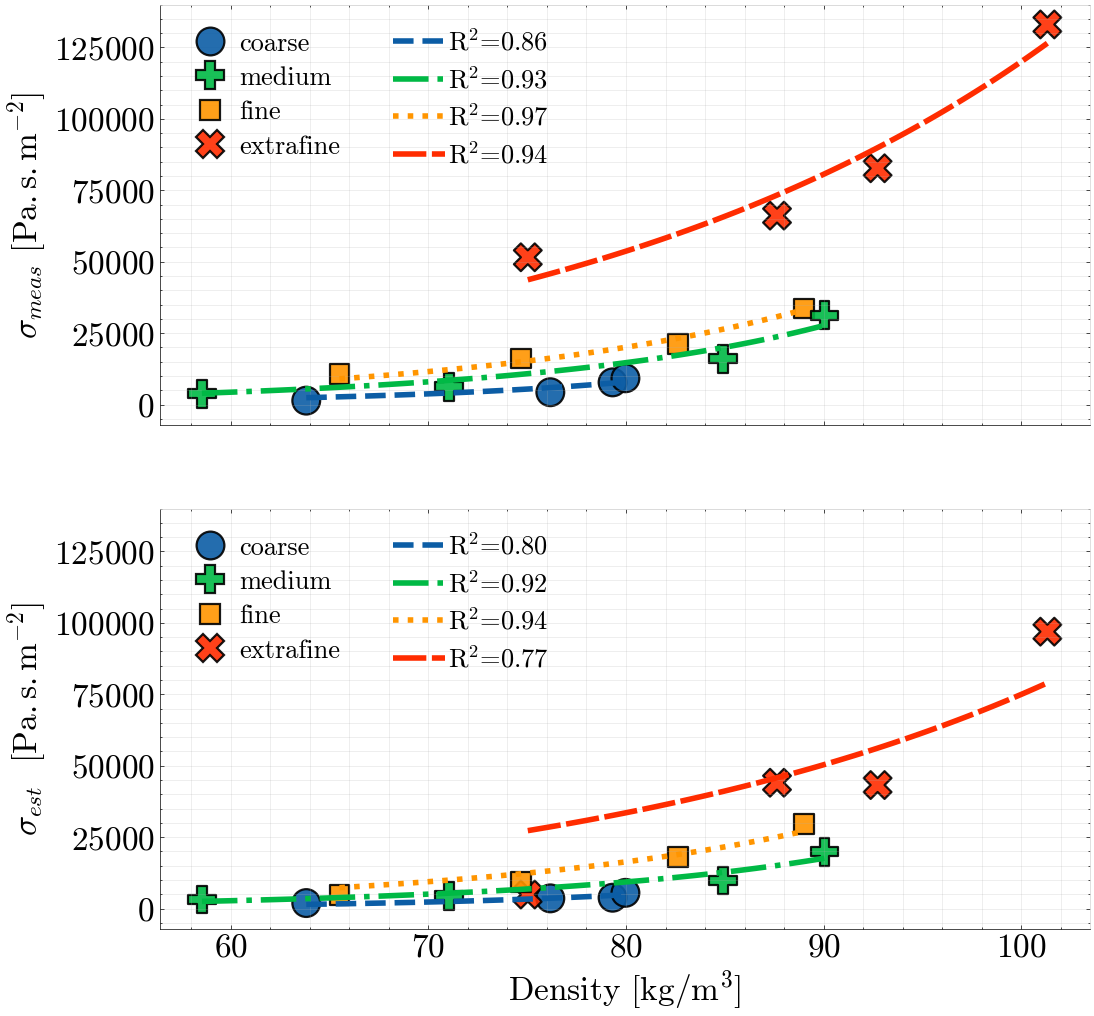

In [115]:
# RESISTIVITY VALUES MEASURED

import seaborn as sns
import matplotlib.lines as mlines


def get_rsquare(y_data, y_pred):
    # Calculate residuals:
    residuals = y_data - y_pred
    # Total sum of squares:
    ss_total = np.sum((y_data - np.mean(y_data))**2)
    # Residual sum of squares:
    ss_residual = np.sum(residuals**2)
    # R-squared:
    r_squared = 1 - (ss_residual / ss_total)
    
    return round(r_squared, 2)

fig, ax = plt.subplots(2, 1, figsize=(12, 12), sharex=True, sharey=False)
ax = ax.flatten()   #This line makes one index ax

sns.scatterplot(data=samples_abs_df, x='dens_value', y='sigma_measured', ax=ax[0],legend='brief' , s=400, sizes=(200, 400), edgecolor='black', hue='granul', hue_order=['coarse', 'medium', 'fine', 'extrafine'], style='granul', alpha=0.9)

custom_order_granul = ['coarse', 'medium', 'fine', 'extrafine']
fontsize=24
# Plot regression lines for each hue
for i, granul_value in enumerate(custom_order_granul):
    subset = samples_abs_df[samples_abs_df['granul'] == granul_value]
    
    xdata = subset['dens_value']
    ydata = subset['sigma_measured']
    
    dens_frame = subset['dens_value'] / (1 - subset['porosity_estimated'])   # From the porosity graph it can be seen that it is constant in most of cases except extrafine
    dens_frame_mean = dens_frame.mean() 
    #print(dens_frame)
    
    # Function to fit
    def resistivity_vorhorosh(x, Rparticle): 
        poro_inter = 1 - (x/dens_frame_mean)
        return (100*eta*(1 - poro_inter)**2 * (1 + poro_inter)**5) / (poro_inter * Rparticle**2)
    
    def resistivity_DuPlessis(x, Rparticle):
        poro_inter = 1 - (x/dens_frame_mean)
        A = (25.4*poro_inter**3) / ((1 - poro_inter)**(2/3) * (1 - (1 - poro_inter)**(1/3)) * (1 - (1 - poro_inter)**(2/3))**2)
        return (A*eta*(1 - poro_inter)**2) / (((4/3)*np.pi)**(2/3) * (Rparticle)**2 * (poro_inter)**3)

    # Fit in the interval data
    # popt, pcov = curve_fit(resistivity_vorhorosh, xdata, ydata)
    popt, pcov = curve_fit(resistivity_DuPlessis, xdata, ydata)
    
    ypred = resistivity_DuPlessis(xdata, *popt)
    r2 = get_rsquare(ydata, ypred)
    r2_label = r'$\mathrm{R^2}$=' f'{r2:.2f}'
    
    xmin = subset['dens_value'].min()
    xmax = subset['dens_value'].max()
    xinterval = np.linspace(xmin, xmax, 100)  # Density range for plotting the fit
    yinterval = resistivity_DuPlessis(xinterval, *popt)
    print(f'R_particle = {round(np.abs(popt[0]*1e3), 2)} mm')
    print(f'R^2 (measured) ={r2}')

    # ax.plot(xinterval, resistivity_vorhorosh(xinterval, *popt), '--')
    ax[0].plot(xinterval, yinterval, linestyle=linestyles[i], linewidth=4, label=r2_label)
    

ax[0].grid(which='both', alpha=0.3)
ax[0].set_xlabel(r'Density [$\mathrm{kg/m^3}$]', fontsize=fontsize)
ax[0].set_ylabel(r'$\sigma_{meas}$ [$\mathrm{Pa.s.m^{-2}}$]' ,fontsize=fontsize )
ax[0].set_ylim(-7000, 140000)
legend=ax[0].legend(fontsize=fontsize-5, labelspacing=0.4,  handletextpad=0.1, markerscale=1, ncol=2)
legend.set_frame_on(False)
ax[0].tick_params(axis='both', labelsize=fontsize)
ax[0].spines['right'].set_color('lightgrey')
ax[0].spines['top'].set_color('lightgrey')


    

sns.scatterplot(data=samples_abs_df, x='dens_value', y='sigma_estimated', ax=ax[1], legend='brief' , s=400, sizes=(200, 400), edgecolor='black', hue='granul', hue_order=['coarse', 'medium', 'fine', 'extrafine'], style='granul', alpha=0.9)
handles, labels = ax[1].get_legend_handles_labels()

markers = ['o', 's', 'D', '^']
linestyles = ['dashed', 'dashdot', 'dotted', (0, (6, 1))]
custom_order_granul = ['coarse', 'medium', 'fine', 'extrafine']

for i, granul_value in enumerate(custom_order_granul):
    subset = samples_abs_df[samples_abs_df['granul'] == granul_value]
    
    xdata = subset['dens_value']
    ydata = subset['sigma_estimated']
    
    dens_frame = subset['dens_value'] / (1 - subset['porosity_estimated'])   # From the porosity graph it can be seen that it is constant in most of cases except extrafine
    dens_frame_mean = dens_frame.mean() 
    #print(dens_frame)
    
    # Function to fit
    def resistivity_vorhorosh(x, Rparticle): 
        poro_inter = 1 - (x/dens_frame_mean)
        return (100*eta*((1 - poro_inter)**2) * ((1 + poro_inter)**5)) / (poro_inter * Rparticle**2)
    
    def resistivity_DuPlessis(x, Rparticle):
        poro_inter = 1 - (x/dens_frame_mean)
        A = (25.4*poro_inter**3) / ((1 - poro_inter)**(2/3) * (1 - (1 - poro_inter)**(1/3)) * (1 - (1 - poro_inter)**(2/3))**2)
        return (A*eta*(1 - poro_inter)**2) / (((4/3)*np.pi)**(2/3) * (Rparticle)**2 * (poro_inter)**3)

    # Fit in the interval data
    # popt, pcov = curve_fit(resistivity_vorhorosh, xdata, ydata)
    popt, pcov = curve_fit(resistivity_DuPlessis, xdata, ydata)
    
    ypred = resistivity_DuPlessis(xdata, *popt)
    r2 = get_rsquare(ydata, ypred)
    r2_label = r'$\mathrm{R^2}$=' f'{r2:.2f}'

    
    xmin = subset['dens_value'].min()
    xmax = subset['dens_value'].max()
    
    xinterval = np.linspace(xmin, xmax, 100)  # Density range for plotting the fit
    yinterval = resistivity_DuPlessis(xinterval, *popt)
    print(f'R_particle = {round(np.abs(popt[0]*1e3), 2)} mm')
    print(f'R^2 (estimated) ={r2}', f'{granul_value}')
    
    ax[1].plot(xinterval, yinterval, linestyle=linestyles[i], linewidth=4, label=r2_label)
    legend = ax[1].legend()
    legend.labelspacing = 0.1 

    # relative_error = sum((subset['sigma_measured'] - subset['sigma_estimated'])) / sum(subset['sigma_measured'])
    # relative_error = round(relative_error * 100, 2)  # Convert to percentage
    relative_error = ((subset['sigma_measured'] - subset['sigma_estimated']) / subset['sigma_measured'])*100
    relative_error = round(relative_error.mean(), 2)  # Convert to percentage
    print(f'Relative error:{relative_error} %', f'{granul_value}')  

ax[1].grid(which='both', alpha=0.3)
ax[1].set_xlabel(r'Density [$\mathrm{kg/m^3}$]', fontsize=fontsize)
ax[1].set_ylabel(r'$\sigma_{est}$  [$\mathrm{Pa.s.m^{-2}}$]' ,fontsize=fontsize)
ax[1].set_ylim(-7000, 140000)
legend=ax[1].legend(fontsize=fontsize-5, labelspacing=0.4,  handletextpad=0.1, markerscale=1, ncol=2)
legend.set_frame_on(False)

ax[1].tick_params(axis='both', labelsize=fontsize)
ax[1].spines['right'].set_color('lightgrey')
ax[1].spines['top'].set_color('lightgrey')

plt.subplots_adjust(wspace=0.3)

plt.show()




In [48]:
subset['sigma_measured'] - subset['sigma_estimated']

sample
YM2_extrafine_d1       22092.0
YM2_extrafine_d2       39469.0
YM2_extrafine_d3       36126.0
YM2_extrafine_loose    46652.0
dtype: float64

R^2 (porosity) =0.92
den_frame = 135.04 kg/m^3
R^2 (porosity) =0.96
den_frame = 157.55 kg/m^3
R^2 (porosity) =0.95
den_frame = 172.83 kg/m^3
R^2 (porosity) =0.78
den_frame = 236.08 kg/m^3


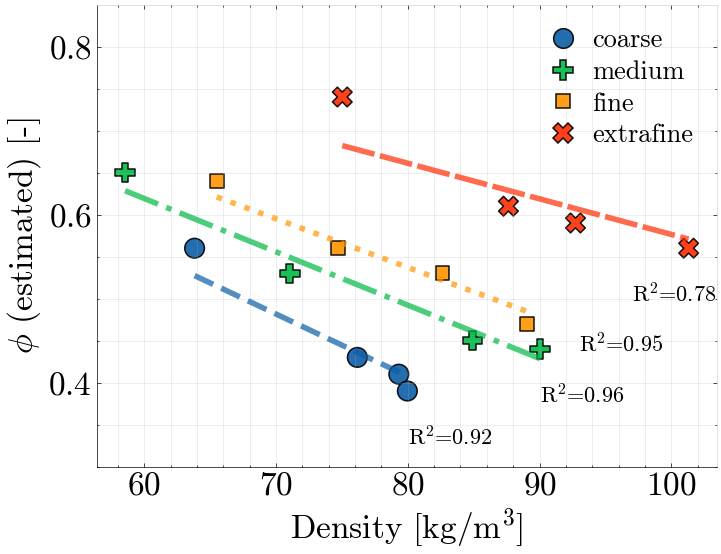

In [119]:
# POROSITY ESTIMATION
from scipy import stats

fig, ax = plt.subplots(figsize=(8, 6))
fontsize=24

custom_order_granul = ['coarse', 'medium', 'fine', 'extrafine']

ax = sns.scatterplot(data=samples_abs_df, x='dens_value', y='porosity_estimated', legend='brief' , s=200, sizes=(200, 400),  edgecolor='black', hue='granul', hue_order=['coarse', 'medium', 'fine', 'extrafine'] ,style='granul', alpha=0.9)

legend1 = ax.get_legend()

markers = ['o', 's', 'D', '^']
linestyles = ['dashed', 'dashdot', 'dotted', (0, (6, 1))]

legend_labels = []

xpos = [80, 90, 93 , 97]
ypos = [0.35, 0.4, 0.46, 0.52]

# Plot regression lines for each hue
for i, granul_value in enumerate(custom_order_granul):
    subset = samples_abs_df[samples_abs_df['granul'] == granul_value]

    def porosity_fit(x, dens_frame):
        
        return 1 - (x/dens_frame) 
    
    x = subset['dens_value']
    y = subset['porosity_estimated']

    popt, pcov = curve_fit(porosity_fit, x, y, p0=[subset['dens_value'].mean()])  # Initial guess for dens_frame

    ypred = porosity_fit(x, *popt)
    r2 = get_rsquare(y, ypred)
    print(f'R^2 (porosity) ={r2}')
    print(f'den_frame = {round(np.abs(popt[0]), 2)} kg/m^3') # Desnsity frame value, calculated from the fitting of the porosity over density

    xmin = subset['dens_value'].min()
    xmax = subset['dens_value'].max()
    
    xinterval = np.linspace(xmin, xmax, 100)  # Density range for plotting the fit
    # yinterval = slope * xinterval + intercept
    yinterval = porosity_fit(xinterval, *popt)

    label = r'($\mathrm{R^2}$=' f'{r2:.2f})'
    legend_labels.append(label)


    ax.plot(xinterval, yinterval, linestyle=linestyles[i], linewidth=4, alpha=0.7)
    ax.text(xpos[i], ypos[i], r'$\mathrm{R^2}$=' f'{r2:.2f}', fontsize=16, verticalalignment='top')


ax.grid(which='both', alpha=0.3)

ax.set_xlabel(r'Density [$\mathrm{kg/m^3}$]', fontsize=fontsize)
ax.set_ylabel(r'$\phi$ (estimated) [-]' ,fontsize=fontsize)

legend =ax.legend(fontsize=fontsize-5, labelspacing=0.3,  handletextpad=0.1, loc='best', markerscale=1, ncol=1, columnspacing=.5)
legend.set_frame_on(False)

ax.tick_params(axis='both', labelsize=fontsize)
ax.spines['right'].set_color('lightgrey')
ax.spines['top'].set_color('lightgrey')
ax.set_yticks(np.arange(0.2, 0.8, 0.2))
ax.set_ylim([0.3, 0.85])

plt.show()



In [37]:
# sns.regplot(data=samples_abs_df, x='dens_value', y='sigma_measured',order=3, ci=None , scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red', 'linewidth': 2})

In [86]:
xinterval[-1]

101.32

In [38]:
# Save the dataframe as .csv

#samples_abs_df.to_csv('YM2_dataset_full.csv', index=True)

### Characteristic lengths $\Lambda$ and $\Lambda^{'}$